### Intro to geopandas: The very basics

- Fundamentals
- Basic choropleth plots
- Centroids and projections
- Points and polygons

<img src="geopanda_pic.png" alt="drawing" style="width:200px;"/>

### Load the library, create and environment if needed

- Load as gpd as below...
- As before, may need to create an new environment to use geopandas...
- To create a new environment:

In [1]:
#To make a new environment and install packages in the terminal:
#Uncomment if you actually want to do this

#conda create -n my_env
#conda activate my_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install <my_package>


In [2]:
#Now load geopandas plus other standard libraries
#####

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import geopandas as gpd

### Basic geopandas: First let's load some very basic Natural Earth data

In [3]:
#First, load the basic data from Natural Earth
#Can get many other local or remote datasets, start with this...
#"gdf" is a common generic variable name = GeoDataFrame
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Note that geopandas has three built-in datasets that you can use to test with
#Check using this command:
display(gpd.datasets.available)

#And now let's display the GeoDataFrame using the head() method
#Many of the same Pandas methods, etc. for DataFrames work with GeoDataFrames

display(gdf.head())

#Could also show the last five
#gdf.tail()

#Or, say, the first 15:
#gdf.head(15)

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

<AxesSubplot: >

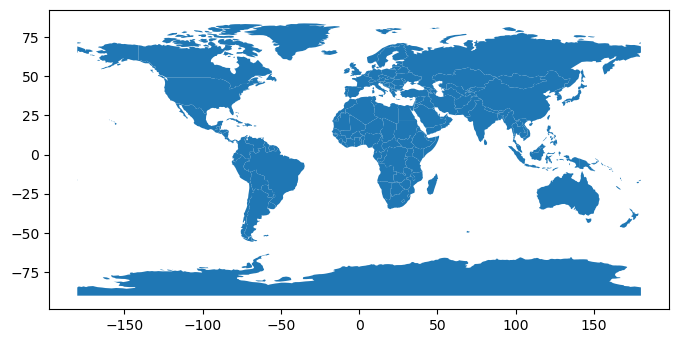

In [4]:
#And for the most basic of plots...
gdf.plot(figsize=(8,8))

<AxesSubplot: >

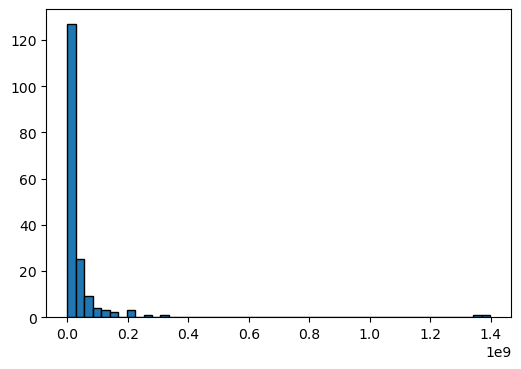

In [5]:
#Note that we can use the same pandas plotting stuff as for standard DataFrames:
####

#Do a quick histogram of population:
fig1, ax1 = plt.subplots(1, 1, figsize=(6,4))

gdf['pop_est'].hist(ax = ax1, bins = 50, edgecolor='black', grid=False)


<AxesSubplot: ylabel='Frequency'>

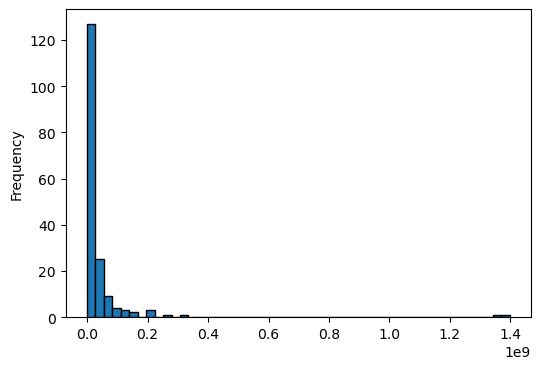

In [6]:
#Could also do:
fig1, ax1 = plt.subplots(1, 1, figsize=(6,4))

gdf['pop_est'].plot(ax=ax1, kind='hist', bins = 50, edgecolor='black')

In [7]:
#What are our apparent outliers?
gdf.sort_values(by='pop_est', ascending=False).head(10)

pop_est      continent                      name iso_a3  gdp_md_est  \
139  1.397715e+09           Asia                     China    CHN    14342903   
98   1.366418e+09           Asia                     India    IND     2868929   
4    3.282395e+08  North America  United States of America    USA    21433226   
8    2.706256e+08           Asia                 Indonesia    IDN     1119190   
102  2.165653e+08           Asia                  Pakistan    PAK      278221   
29   2.110495e+08  South America                    Brazil    BRA     1839758   
56   2.009636e+08         Africa                   Nigeria    NGA      448120   
99   1.630462e+08           Asia                Bangladesh    BGD      302571   
18   1.443735e+08         Europe                    Russia    RUS     1699876   
27   1.275755e+08  North America                    Mexico    MEX     1268870   

                                              geometry  
139  MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...  
98   POLYGON ((97.32711 28.26158, 97.40256 27.88254...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
8    MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...  
102  POLYGON ((77.83745 35.49401, 76.87172 34.65354...  
29   POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...  
56   POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2....  
99   POLYGON ((92.67272 22.04124, 92.65226 21.32405...  
18   MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...  
27   POLYGON ((-117.12776 32.53534, -115.99135 32.6...

#### Can also do pandas plot methods with geopandas:
Use *`kind`* keyword argument with `plot()` method. Recall options:

- `bar` or `barh` for bar plots

- `hist` for histogram

- `box` for boxplot

- `kde` or `density` for density plots

- `area` for area plots

- `scatter` for scatter plots

- `hexbin` for hexagonal bin plots

- `pie` for pie plots


C:\Users\steff\AppData\Local\Temp\ipykernel_5580\25320454.py:17: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax2, ax3 = gdf.boxplot(column = ["pop_est", "gdp_md_est"], by = "continent", ax = ax1, showmeans=True,


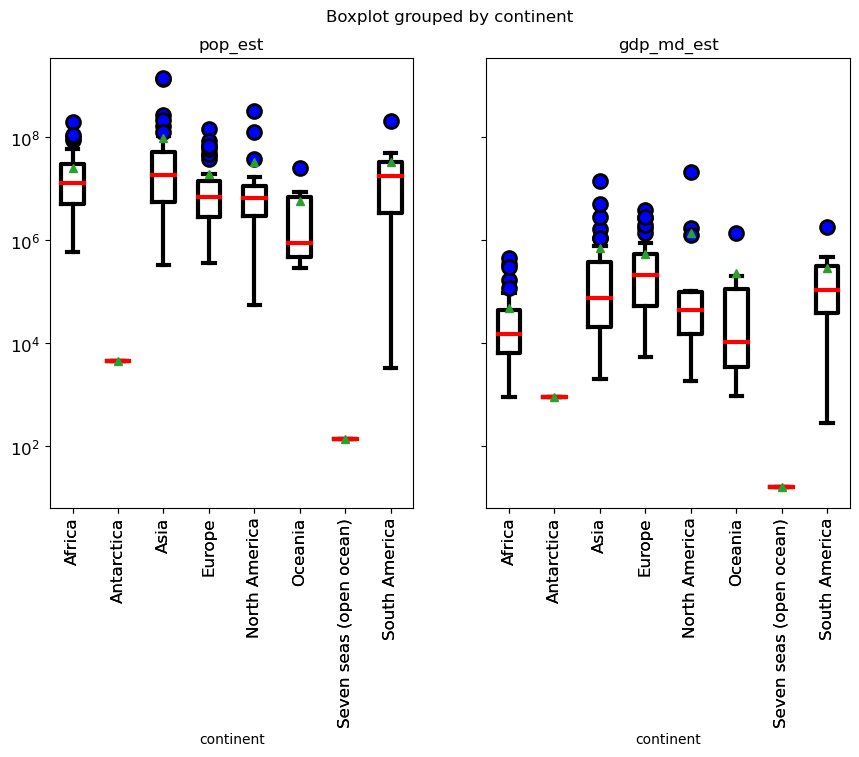

In [8]:
#For example, a customized boxplot with pandas plotting:
#Population and gpd by continent

#Set up our properties...
boxprops = dict(linewidth = 3, color = 'black')
whiskerprops = dict(linestyle = '-', linewidth=3, color='black')
#boxprops = dict(linewidth = 3, color = 'black')
capprops = dict(linewidth = 3, color = 'black')
flierprops = dict(markersize=10, markeredgewidth=2, markeredgecolor='black', markerfacecolor='blue')
medianprops = dict(linewidth = 3, color = 'red')

#And plot!
##########
fig1, ax1 = plt.subplots(1, 1, figsize=(10,6))

#Do both pop_est and gdp_md_est
ax2, ax3 = gdf.boxplot(column = ["pop_est", "gdp_md_est"], by = "continent", ax = ax1, showmeans=True, 
            boxprops = boxprops,
            whiskerprops = whiskerprops,
            capprops = capprops,
            flierprops = flierprops,
            medianprops = medianprops,
            rot = 90, grid=False, fontsize=12);

#Try with vs. without log scale
ax3.set_yscale('log');


#### Or with seaborn:


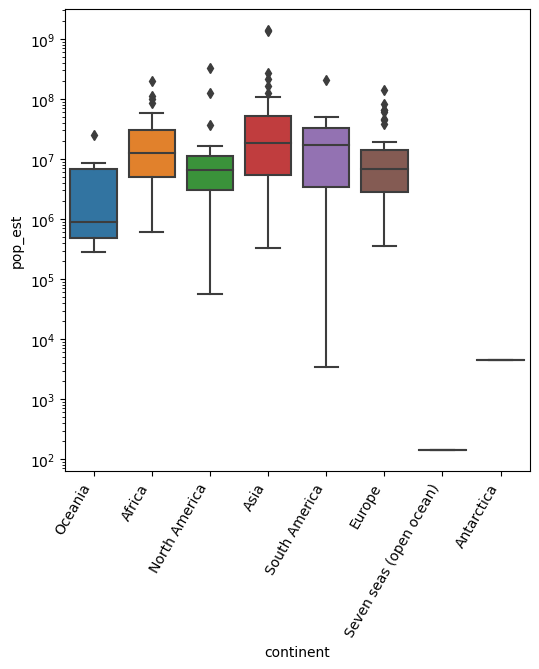

In [9]:
import seaborn as sns

fig1, ax1 = plt.subplots(1, 1, figsize=(6,6))

sns.boxplot(data=gdf, x='continent', y='pop_est', ax=ax1)

ax1.set_yscale('log');
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=60, ha='right');

### Some Basic “Choropleth” Plots!

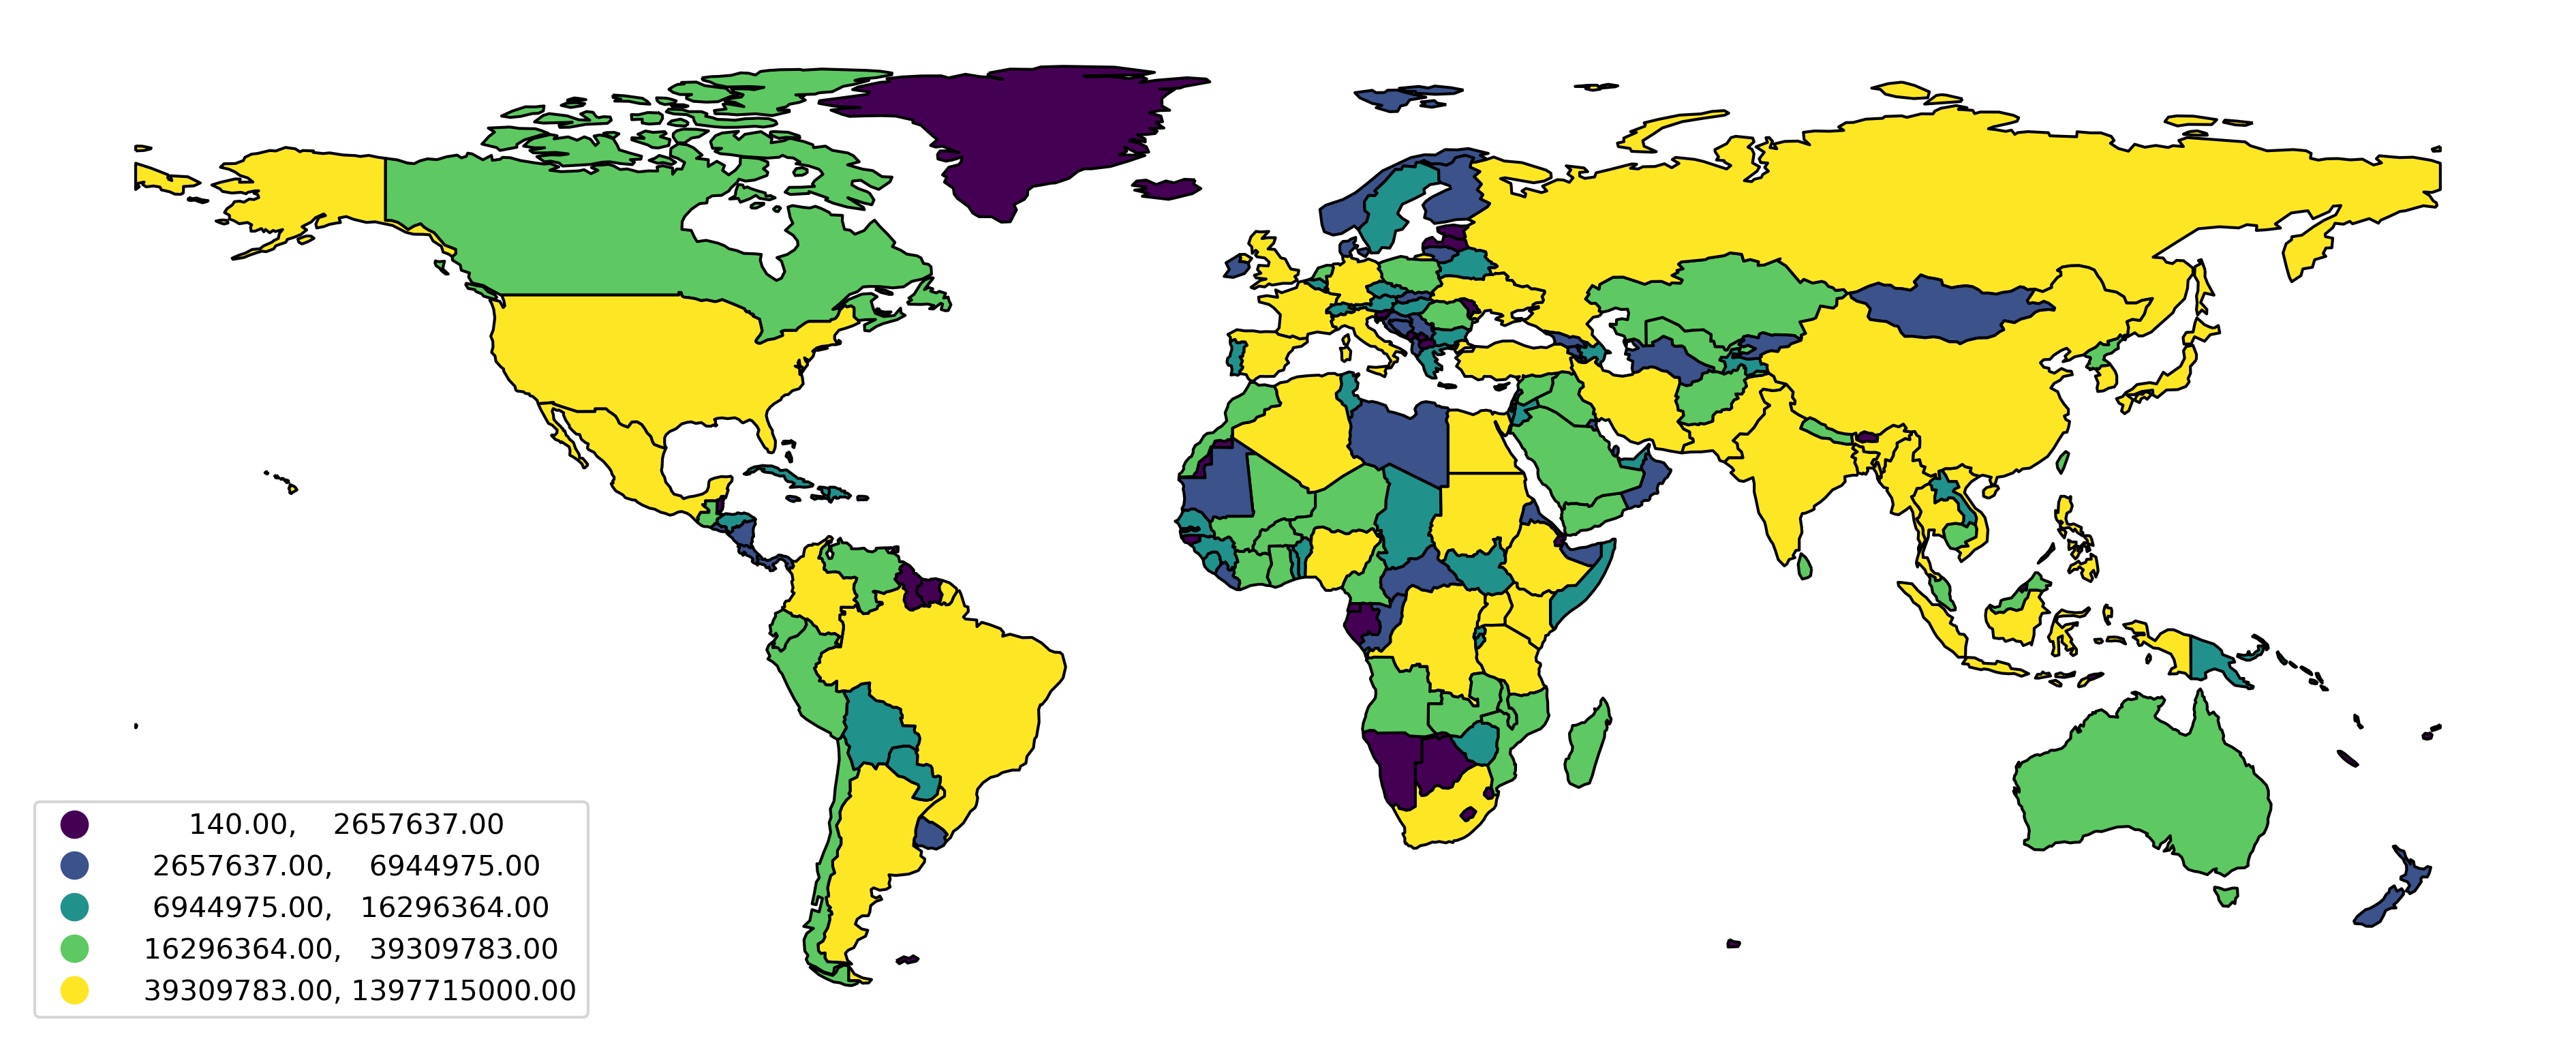

In [10]:
#Let's plot with some random counties NaNed
##########

gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Exclude Antarctica
gdf = gdf.loc[gdf.continent != 'Antarctica']


#Take 20 countries, set population to nan
#gdf.loc[np.random.choice(gdf.index, 20), 'pop_est'] = np.nan


fig, ax1 = plt.subplots(1,1, figsize=(16, 10), dpi=300)

#Note: scheme + k
#edgecolor: "black", etc. vs. "face"
#missing_kwds, legend, and legend_kwds

gdf.plot(ax=ax1, scheme="quantiles", k = 5, column = 'pop_est', linewidth = 1, edgecolor = 'black',
           missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "//////", "label": "Missing values"},
           legend = True, legend_kwds={'loc': 'lower left'}) 


#Set some axis stuff
#ax1.set_xticks([])
#ax1.set_yticks([])

#Or could just:
ax1.set_axis_off();


In [11]:
 gdf.total_bounds

array([-180.     ,  -55.61183,  180.     ,   83.64513])

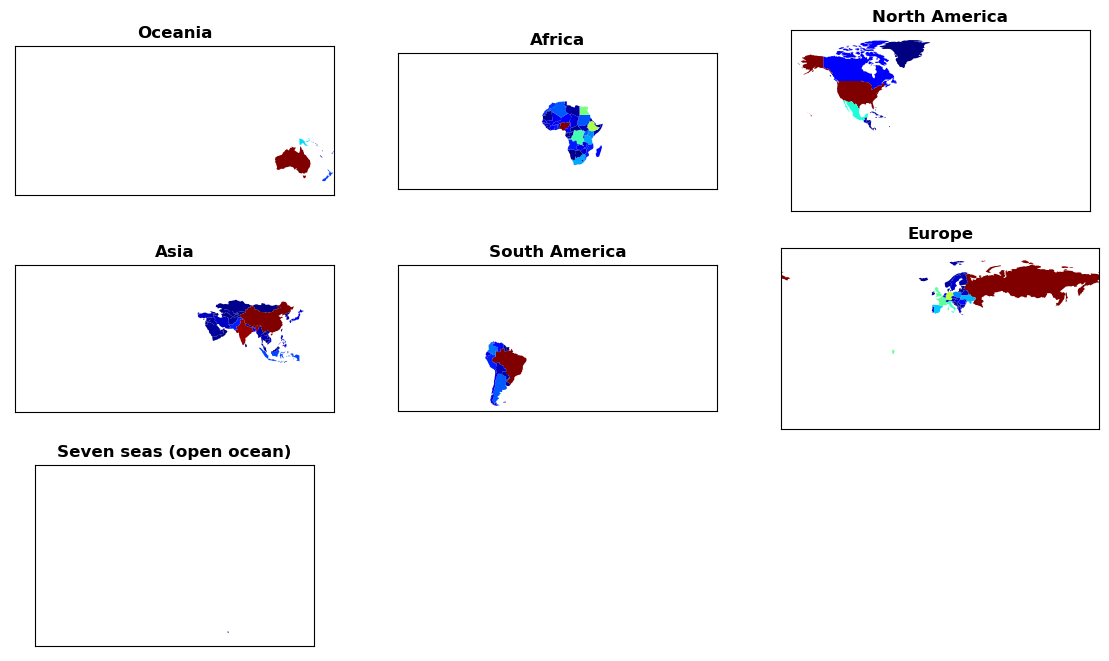

In [12]:
#Let's plot each continent in its own subfigure
#Have 8 continents, including open ocean

fig, ax1 = plt.subplots(3,3, figsize=(14, 8))

ax1 = ax1.flatten()

#Pythonic iteration though the continents
for i, c in enumerate(gdf.continent.unique()):

    #Plot...
    gdf.loc[gdf['continent'] == c].plot(ax = ax1[i], column = 'pop_est', cmap = 'jet',
                                       missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///\\\\\\"})

    #Set title
    ax1[i].set_title(c, fontweight='bold')
    
    
    #Let's set x and y lim to the overall gdf bounds
    #Unpack:
    x1, y1, x2, y2 = gdf.total_bounds
    
    #And set horizontal:
    ax1[i].set_xlim([x1, x2])
    
    #Give a little extra vertical:
    ax1[i].set_ylim([y1*1.1, y2*1.1])
    
    
    #Remove the tick markers
    ax1[i].set_xticks([])
    ax1[i].set_yticks([])

    #Could try setting aspect ratio:
    #ax1[i].set_aspect(4.0) #'equal')
    
ax1[7].set_axis_off()
ax1[8].set_axis_off()

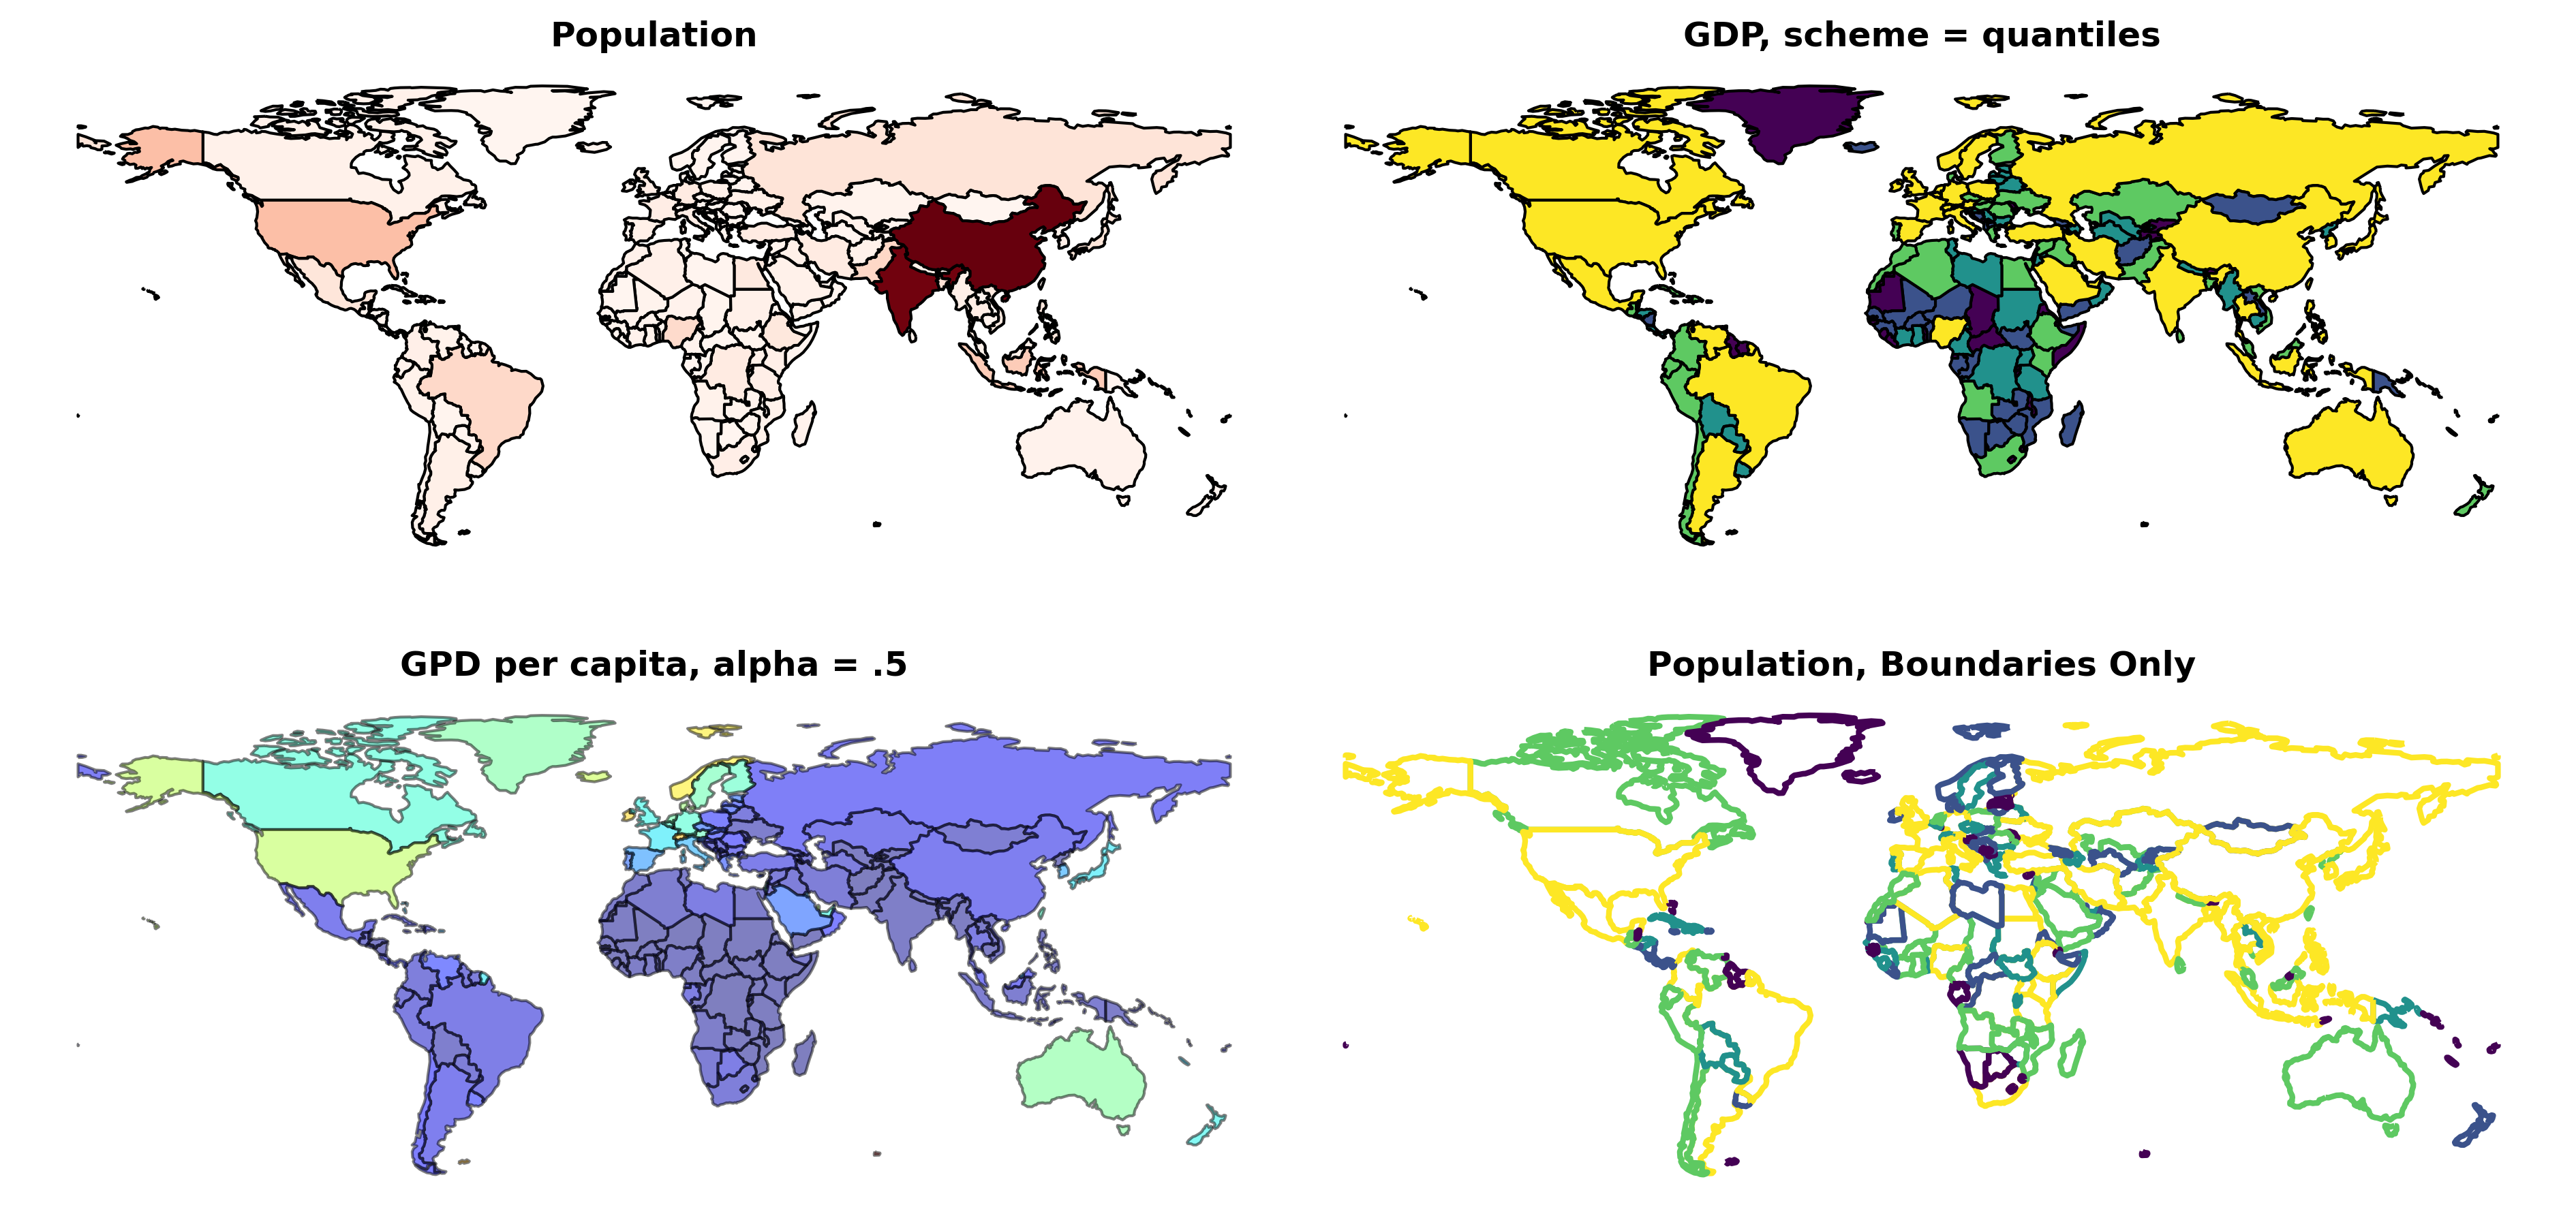

In [13]:
#Some more basic choropleth plots
####################

#Reload to remove NaNs:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Exclude Antarctica
gdf = gdf.loc[gdf.continent!='Antarctica']

#Make a gpd per capita column:
gdf['gpd_per_cap'] = gdf.gdp_md_est / gdf.pop_est


#Do a bunch of figures!
fig, ax1 = plt.subplots(2,2, figsize=(16, 8), dpi=300)


#Population
#####
gdf.plot(ax = ax1[0,0], column = 'pop_est', linewidth = 1, edgecolor = 'black', cmap = 'Reds')
ax1[0,0].set_title('Population', fontweight='bold')
ax1[0,0].set_axis_off();

#GDP
#####
gdf.plot(ax = ax1[0,1], column = 'gdp_md_est', linewidth = 1, edgecolor = 'black', cmap = 'viridis',
         scheme='quantiles')
ax1[0,1].set_title('GDP, scheme = quantiles', fontweight='bold')
ax1[0,1].set_axis_off();

#GDP per Capita
#####
gdf.plot(ax = ax1[1,0], column = 'gpd_per_cap', linewidth = 1, edgecolor = 'black', cmap = 'jet', alpha = .5)
ax1[1,0].set_title('GPD per capita, alpha = .5', fontweight='bold')
ax1[1,0].set_axis_off();

#Population, just the Boundaries
#####
gdf.plot(ax = ax1[1,1], facecolor='none', column = 'pop_est', linewidth = 2, cmap = 'viridis',
         scheme='quantiles')
ax1[1,1].set_title('Population, Boundaries Only', fontweight='bold')
ax1[1,1].set_axis_off();


#And adjust our subplots to be closer together
plt.subplots_adjust(wspace=0.0, hspace=0.0)


<AxesSubplot: >

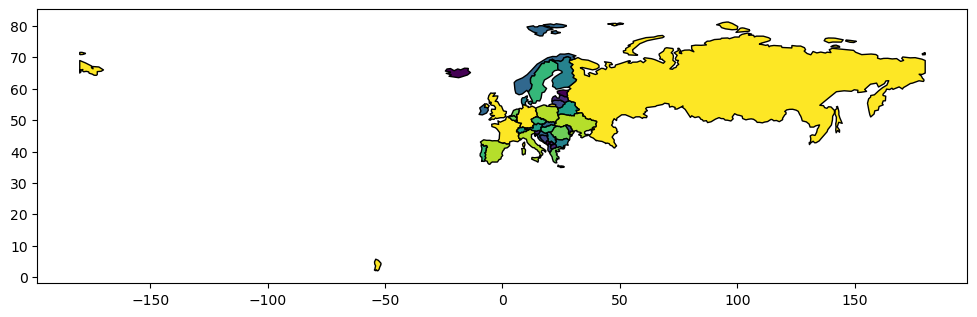

In [14]:
gdf.loc[gdf.continent=='Europe'].plot(figsize=(12,8), column = 'pop_est', linewidth = 1, edgecolor = 'black', cmap = 'viridis',
         scheme='quantiles', k=10) 

<AxesSubplot: >

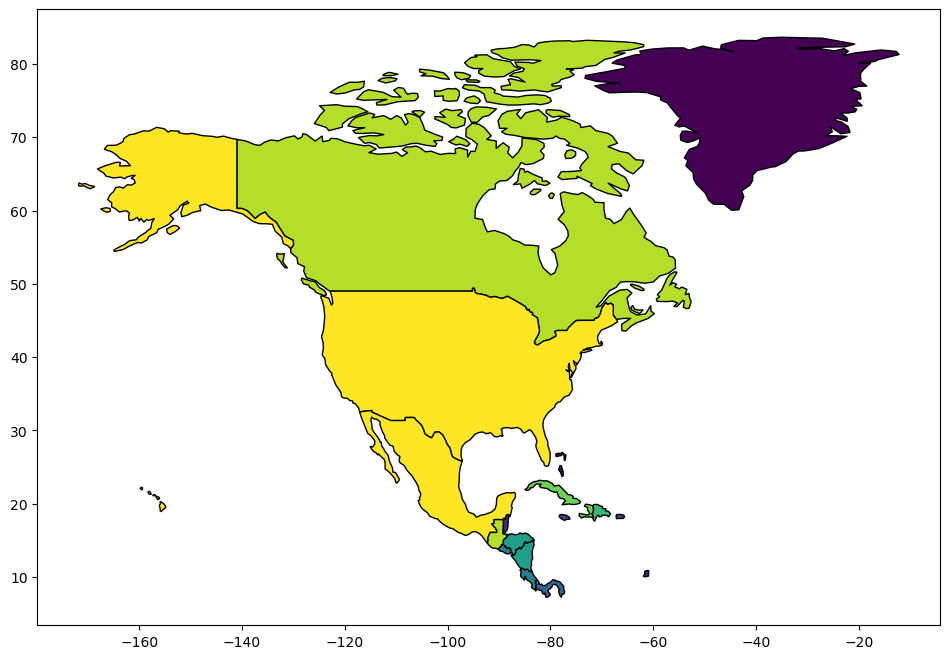

In [15]:
gdf.loc[gdf.continent=='North America'].plot(figsize=(12,8), column = 'pop_est', linewidth = 1, edgecolor = 'black', cmap = 'viridis',
         scheme='quantiles', k=10) 

<AxesSubplot: >

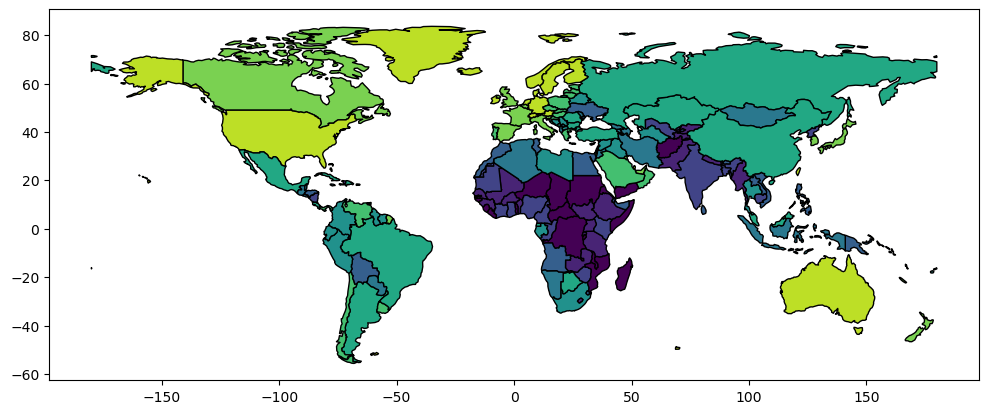

In [16]:
#Note, we don't actually need to create a new column/variable:
#Note also vmax and vmin
#####

gdf.plot(figsize=(12,8), column = gdf.gdp_md_est / gdf.pop_est, linewidth = 1, edgecolor = 'black', cmap = 'viridis',
         scheme='quantiles', k=10, vmax=10, vmin=0) 

<AxesSubplot: >

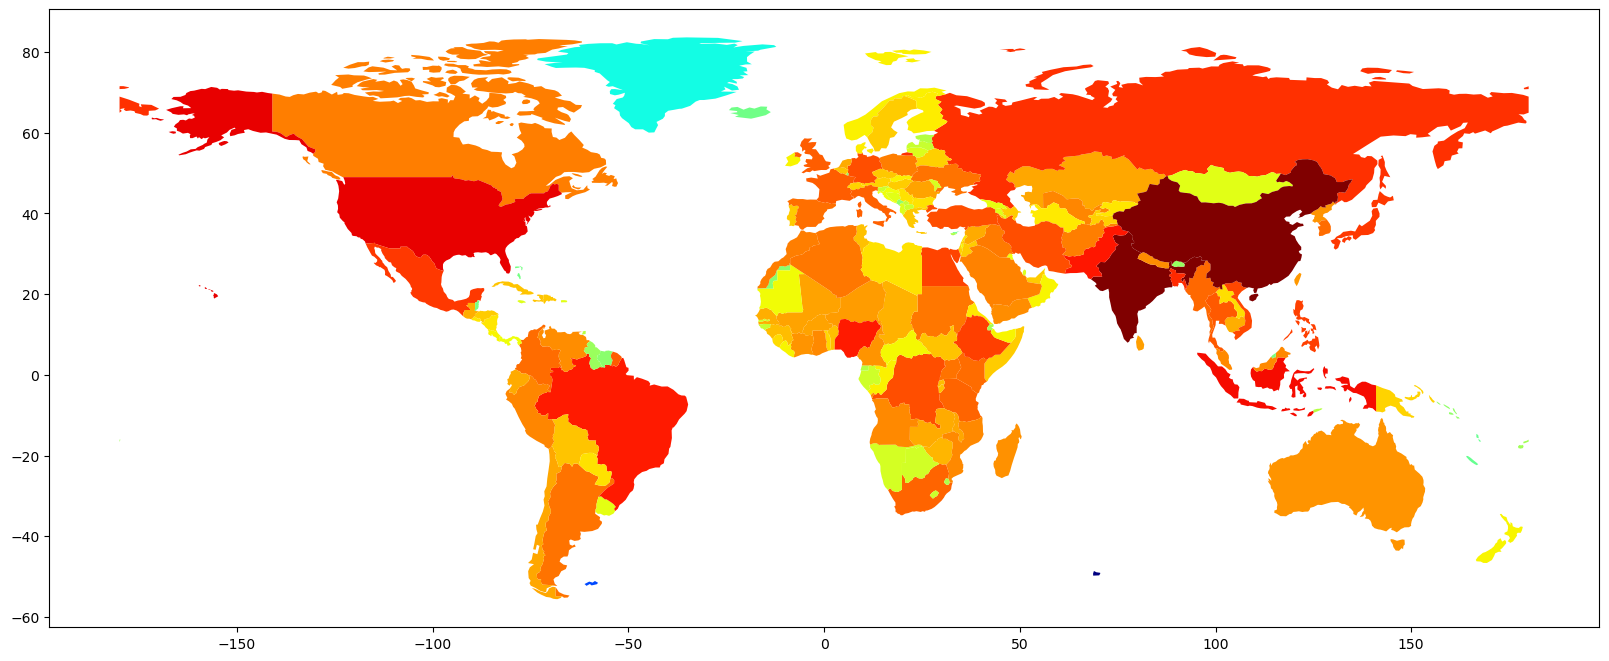

In [17]:
#Log scale
###########

gdf.plot(figsize=(20,16), column = np.log(gdf.pop_est), linewidth = 1, edgecolor = 'none', cmap = 'jet')

### Recall CRS and Centroids

In [18]:
#Plot each country centroid under different CRS
############################

gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Drop Antarctica again:
gdf = gdf.loc[gdf.continent!='Antarctica']

#First, just look at default CRS:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

C:\Users\steff\AppData\Local\Temp\ipykernel_5580\1510840885.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_column'] = gdf.centroid


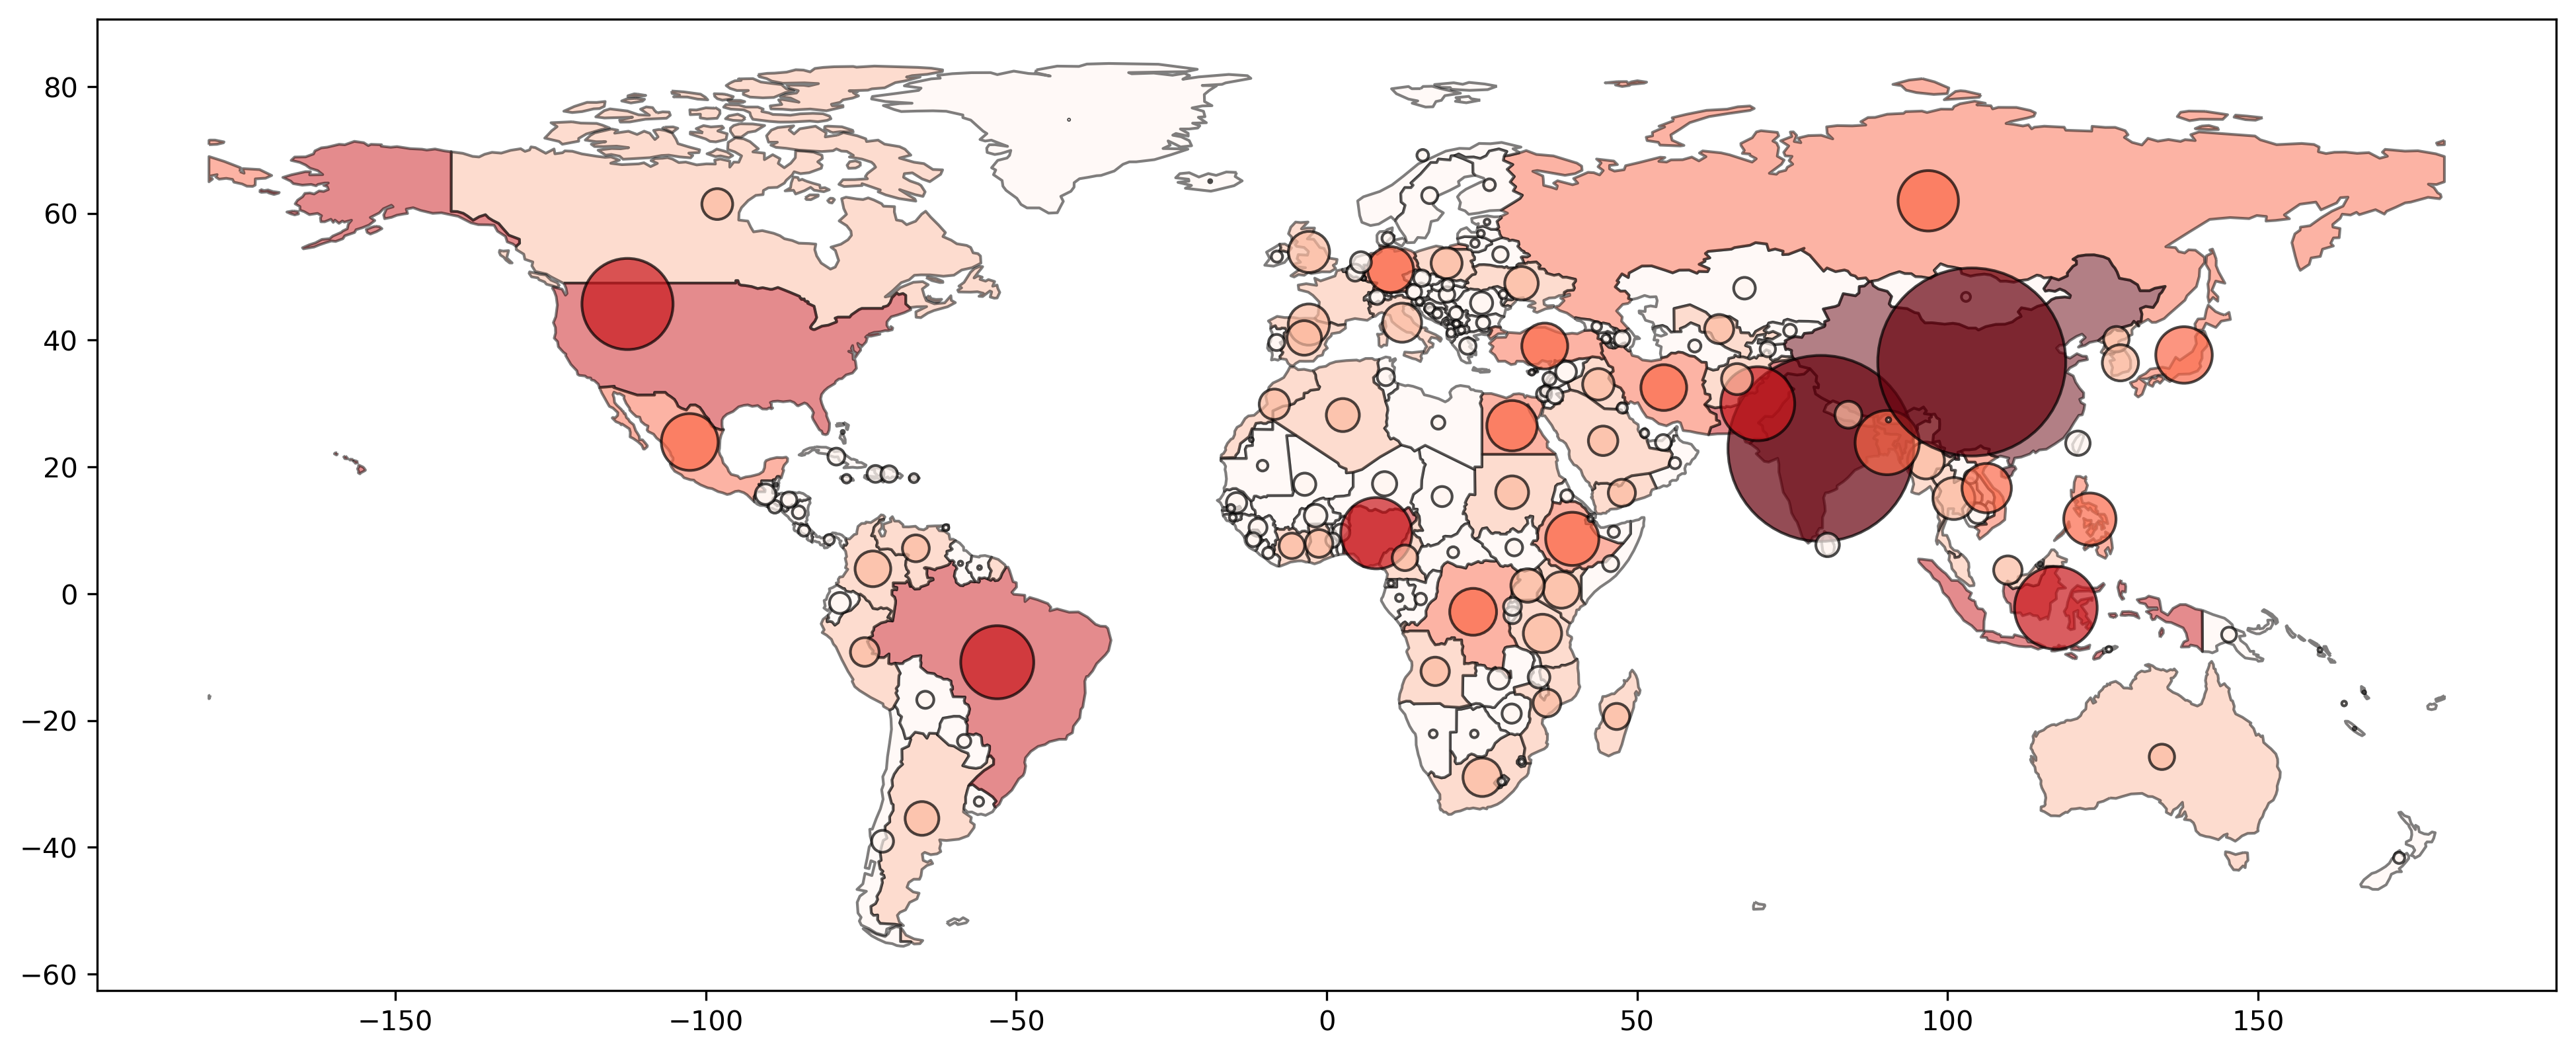

In [19]:
#Now plot with centroids...
####

#Try a few different CRS EPSG codes:
#4326 = Geographic 2D, WGS 84 Daturm
#4269 = Geographic 2D, NAD83 Datum
#3857 = Mercator (Cylindrical projection)
#5070 = North American Albers Equal Area (Conic)
#6933 = Equal-Area Cylindrical
#3035 = Lambert Azimuthal Equal Area centered on Europe (Azimuthal/Planar)

#################
#gdf = gdf.to_crs(5070) 

#Copy and get centroids:
#################
gdf['centroid_column'] = gdf.centroid

gdf2 = gdf.copy()

#We can set geometry:
gdf2 = gdf2.set_geometry('centroid_column')


fig1, ax1 = plt.subplots(1,1, figsize=(16, 8), dpi=300)

#Try changing scheme:
###

#Plot polygons:
######
gdf.plot(ax = ax1, column = 'pop_est', alpha = .5, linewidth=1, edgecolor = 'black', cmap='Reds', scheme='fisherjenks')

#Plot centroids:
#######
gdf2.plot(ax = ax1, column = 'pop_est', markersize = gdf2.pop_est / 3e5,
          alpha = .7, edgecolor = 'black', cmap='Reds', scheme='fisherjenks');


<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

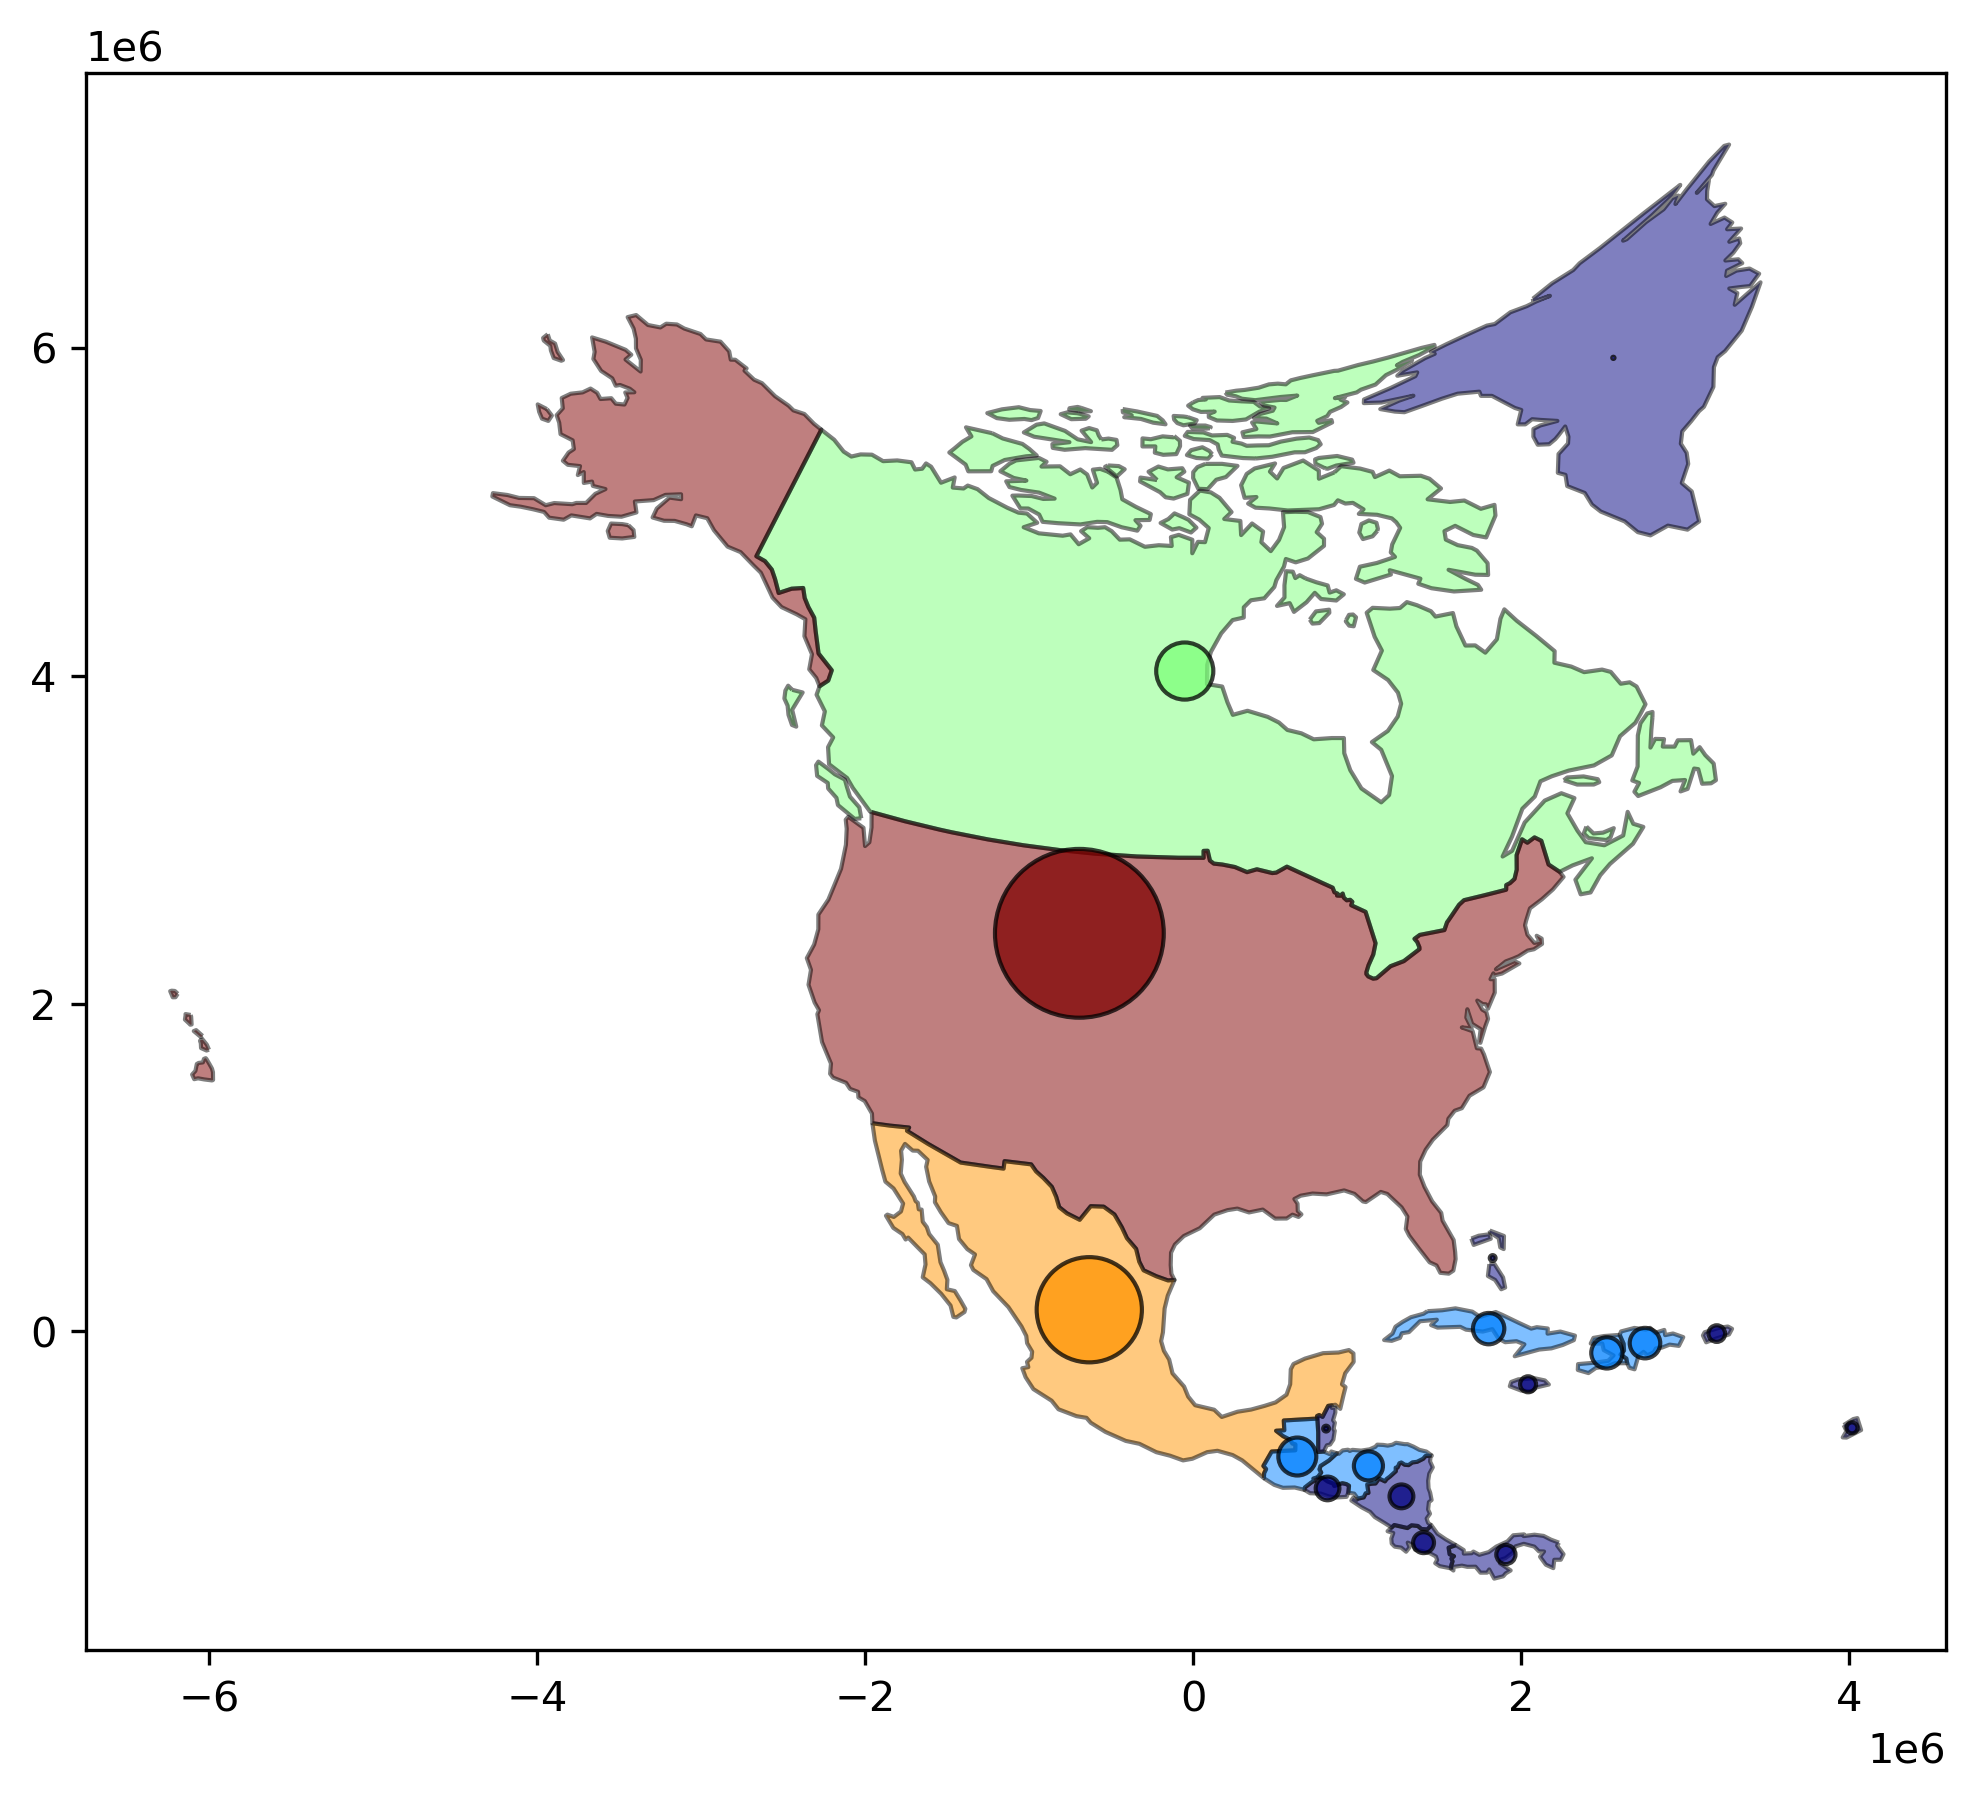

In [20]:
#For 5070, filter to just North America
#########

gdf_na = gdf.loc[gdf.continent == 'North America']

gdf_na = gdf_na.to_crs(5070) 
gdf_na['centroid_column'] = gdf_na.centroid

display(gdf_na.crs)

#And plot:
#Plot polygons:
######
fig1, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=300)

gdf_na.plot(ax = ax1, column = 'pop_est', alpha = .5, linewidth=1, edgecolor = 'black', cmap='jet', scheme='fisherjenks')

#Plot centroids:
#######
gdf_na= gdf_na.set_geometry('centroid_column')
gdf_na.plot(ax = ax1, column = 'pop_est', markersize = gdf_na.pop_est / 2e5, alpha = .75, edgecolor = 'black', cmap='jet', scheme='fisherjenks');



In [21]:
gdf_na

pop_est      continent                      name iso_a3  gdp_md_est  \
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
16    11263077.0  North America                     Haiti    HTI       14332   
17    10738958.0  North America            Dominican Rep.    DOM       88941   
19      389482.0  North America                   Bahamas    BHS       13578   
22       56225.0  North America                 Greenland    GRL        3051   
27   127575529.0  North America                    Mexico    MEX     1268870   
33     4246439.0  North America                    Panama    PAN       66800   
34     5047561.0  North America                Costa Rica    CRI       61801   
35     6545502.0  North America                 Nicaragua    NIC       12520   
36     9746117.0  North America                  Honduras    HND       25095   
37     6453553.0  North America               El Salvador    SLV       27022   
38    16604026.0  North America                 Guatemala    GTM       76710   
39      390353.0  North America                    Belize    BLZ        1879   
45     3193694.0  North America               Puerto Rico    PRI      104988   
46     2948279.0  North America                   Jamaica    JAM       16458   
47    11333483.0  North America                      Cuba    CUB      100023   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   

                                              geometry  \
3    MULTIPOLYGON (((-1962161.370 3167162.825, -197...   
4    MULTIPOLYGON (((-1962161.370 3167162.825, -175...   
16   POLYGON ((2599686.623 -20735.583, 2623645.093 ...   
17   POLYGON ((2645213.400 -193211.750, 2640081.798...   
19   MULTIPOLYGON (((1694883.783 566750.173, 173955...   
22   POLYGON ((2069937.291 6297690.102, 2185915.338...   
27   POLYGON ((-1957421.540 1269943.080, -1851945.2...   
33   POLYGON ((2229538.892 -1287783.805, 2218076.28...   
34   POLYGON ((1600790.629 -1302874.019, 1556319.63...   
35   POLYGON ((1451405.902 -1181788.248, 1426166.09...   
36   POLYGON ((1454080.299 -756870.502, 1415247.555...   
37   POLYGON ((757827.665 -888701.806, 792024.277 -...   
38   POLYGON ((429858.907 -894685.573, 431433.529 -...   
39   POLYGON ((756029.447 -531033.029, 754040.680 -...   
45   POLYGON ((3203107.915 21858.507, 3259284.205 3...   
46   POLYGON ((2007133.556 -290425.151, 2081360.649...   
47   POLYGON ((1426744.926 123762.263, 1516984.189 ...   
175  POLYGON ((3965670.777 -570548.469, 4024342.478...   

                      centroid_column  
3      POINT (-52612.046 4027401.090)  
4     POINT (-695248.118 2428086.180)  
16    POINT (2521426.968 -130454.514)  
17     POINT (2753876.447 -70939.400)  
19     POINT (1824998.091 447876.674)  
22    POINT (2561115.782 5937257.834)  
27     POINT (-634805.296 132619.458)  
33   POINT (1905549.784 -1359972.602)  
34   POINT (1403440.356 -1287748.656)  
35   POINT (1268702.838 -1005438.639)  
36    POINT (1067338.890 -819516.847)  
37     POINT (818067.773 -957142.541)  
38     POINT (633750.859 -762476.303)  
39     POINT (809245.827 -592208.708)  
45     POINT (3191578.051 -12789.915)  
46    POINT (2040888.888 -321917.704)  
47      POINT (1800419.326 17416.042)  
175   POINT (4016322.504 -587538.187)

In [22]:
gdf_na.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Let's add some cities

- Now we'll have a point geometry

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

name                    geometry
0  Vatican City   POINT (12.45339 41.90328)
1    San Marino   POINT (12.44177 43.93610)
2         Vaduz    POINT (9.51667 47.13372)
3       Lobamba  POINT (31.20000 -26.46667)
4    Luxembourg    POINT (6.13000 49.61166)

<AxesSubplot: >

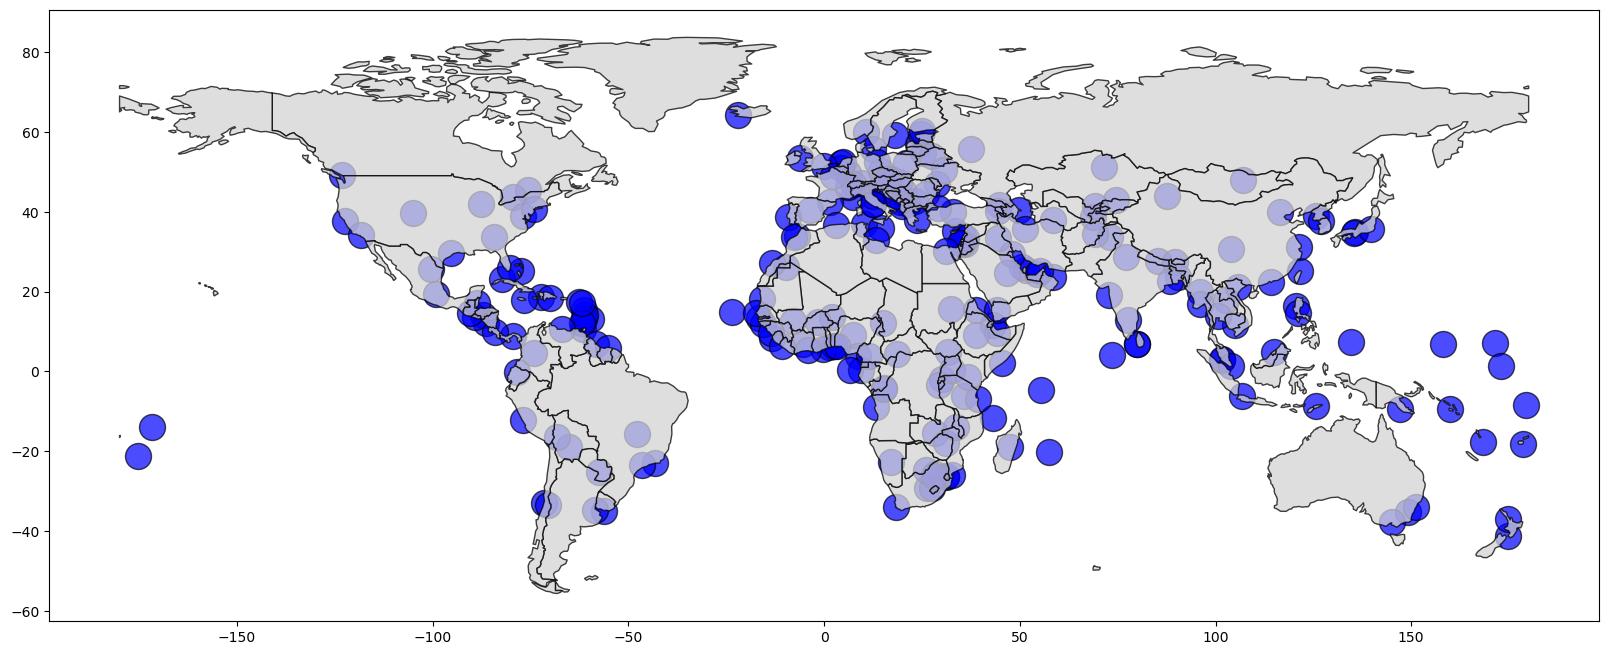

In [23]:

#Get world borders again
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Now, get the cities!
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

#Get rid of Antarctica
world = world.loc[world.continent!='Antarctica']


#Confirm same CRS
display(world.crs)
display(cities.crs)

#See what cities is:
display(cities.head())


#Plot the cities and country borders
######
fig, ax1 = plt.subplots(1,1, figsize=(20, 10))

#Country backgrounds
world.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black', alpha=.75) #, zorder=2)

#Cities
#Note: Try changing the zorder for both plots
cities.plot(ax = ax1, markersize = 350, facecolor='blue', edgecolor='black',
            alpha=.7, zorder=0) #, zorder=1);

#### Make your own points/GeoDataFrame

- Create a random DataFrame of Points:

In [24]:
#Make a GeoDataFrame of N random points:
N = 50
df = pd.DataFrame(
    {'Name': [str(k) for k in (list(range(0, N)))],
     'Latitude': np.random.randint(-89, 89, N),
     'Longitude': np.random.randint(-180, 180, N),
     'Value': np.random.uniform(50, 300, N)})

df.head()

Name  Latitude  Longitude       Value
0    0        35        161  135.880400
1    1        73        -30  284.889702
2    2         3        -74  145.339305
3    3       -40       -101  283.676055
4    4        52        -86   96.304219

In [25]:
#Make a GeoDataFrame of N random points:
#Create the GeoDataFrame
#Always start with EPSG 4326 (or 4269):
gdf_point = gpd.GeoDataFrame(df[['Name', 'Value', 'Latitude', 'Longitude']],
            geometry = gpd.points_from_xy(df.Longitude, df.Latitude), crs = "EPSG:4326")

display(gdf_point.head())


Name       Value  Latitude  Longitude                      geometry
0    0  135.880400        35        161    POINT (161.00000 35.00000)
1    1  284.889702        73        -30    POINT (-30.00000 73.00000)
2    2  145.339305         3        -74     POINT (-74.00000 3.00000)
3    3  283.676055       -40       -101  POINT (-101.00000 -40.00000)
4    4   96.304219        52        -86    POINT (-86.00000 52.00000)

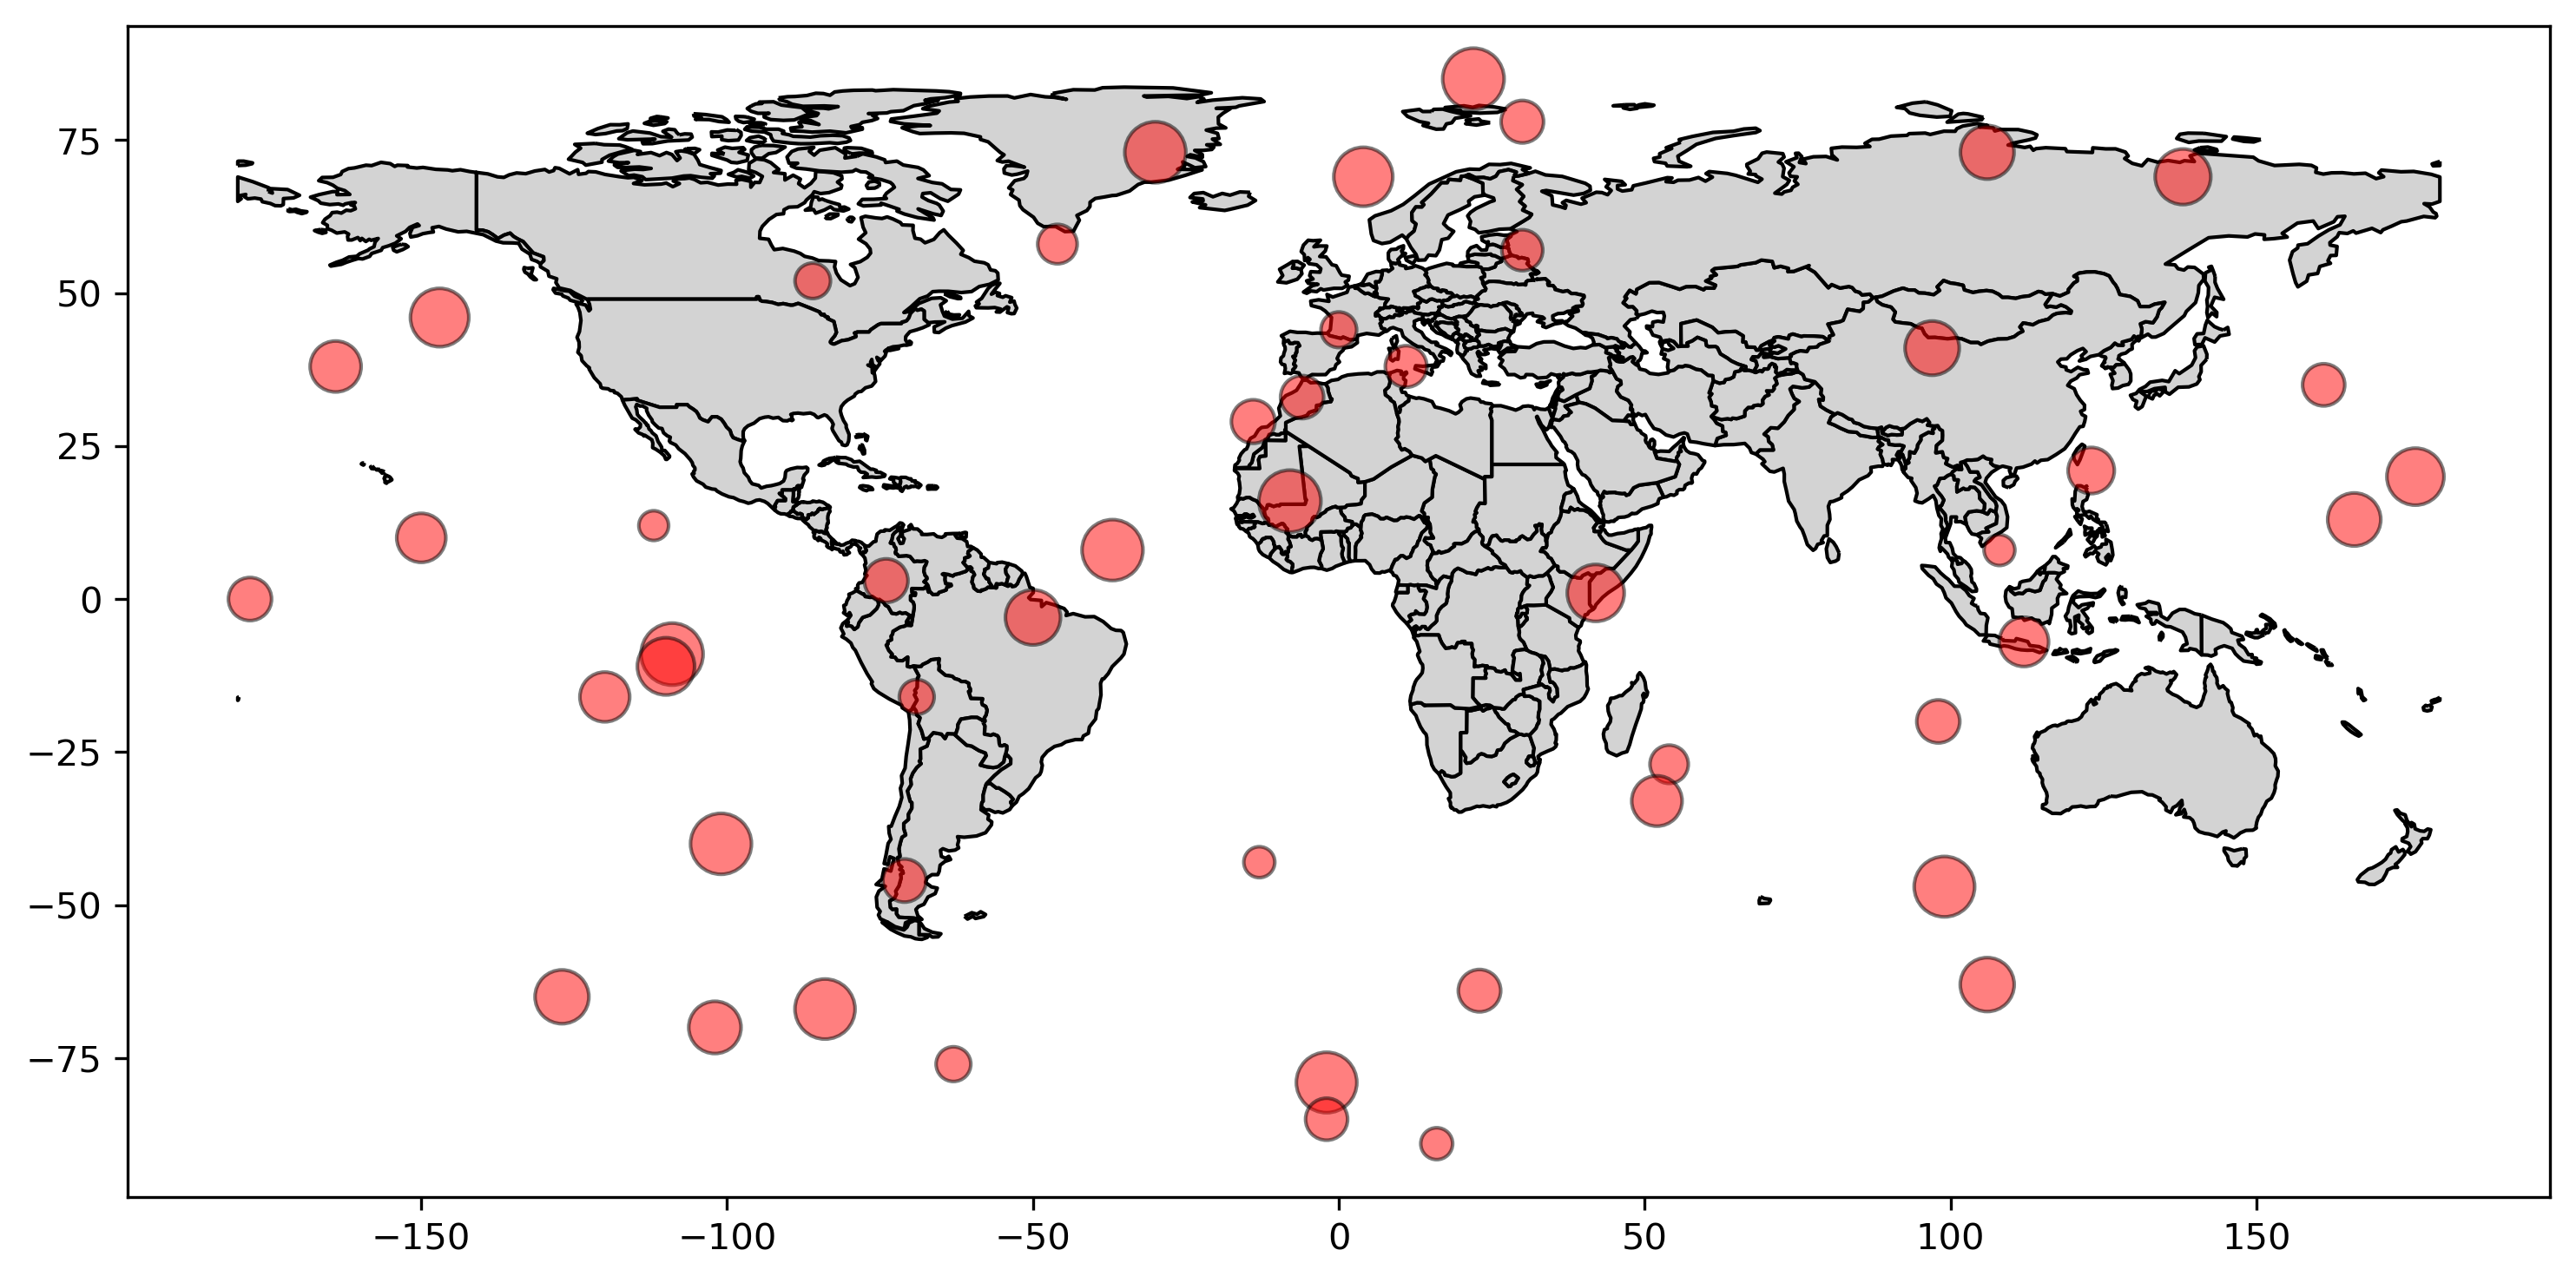

In [26]:
#And plot:
#########

fig, ax1 = plt.subplots(1,1, figsize=(12, 8), dpi=300)

world.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')
gdf_point.plot(ax = ax1, markersize = 'Value', color='red', edgecolor='black', alpha=.5);


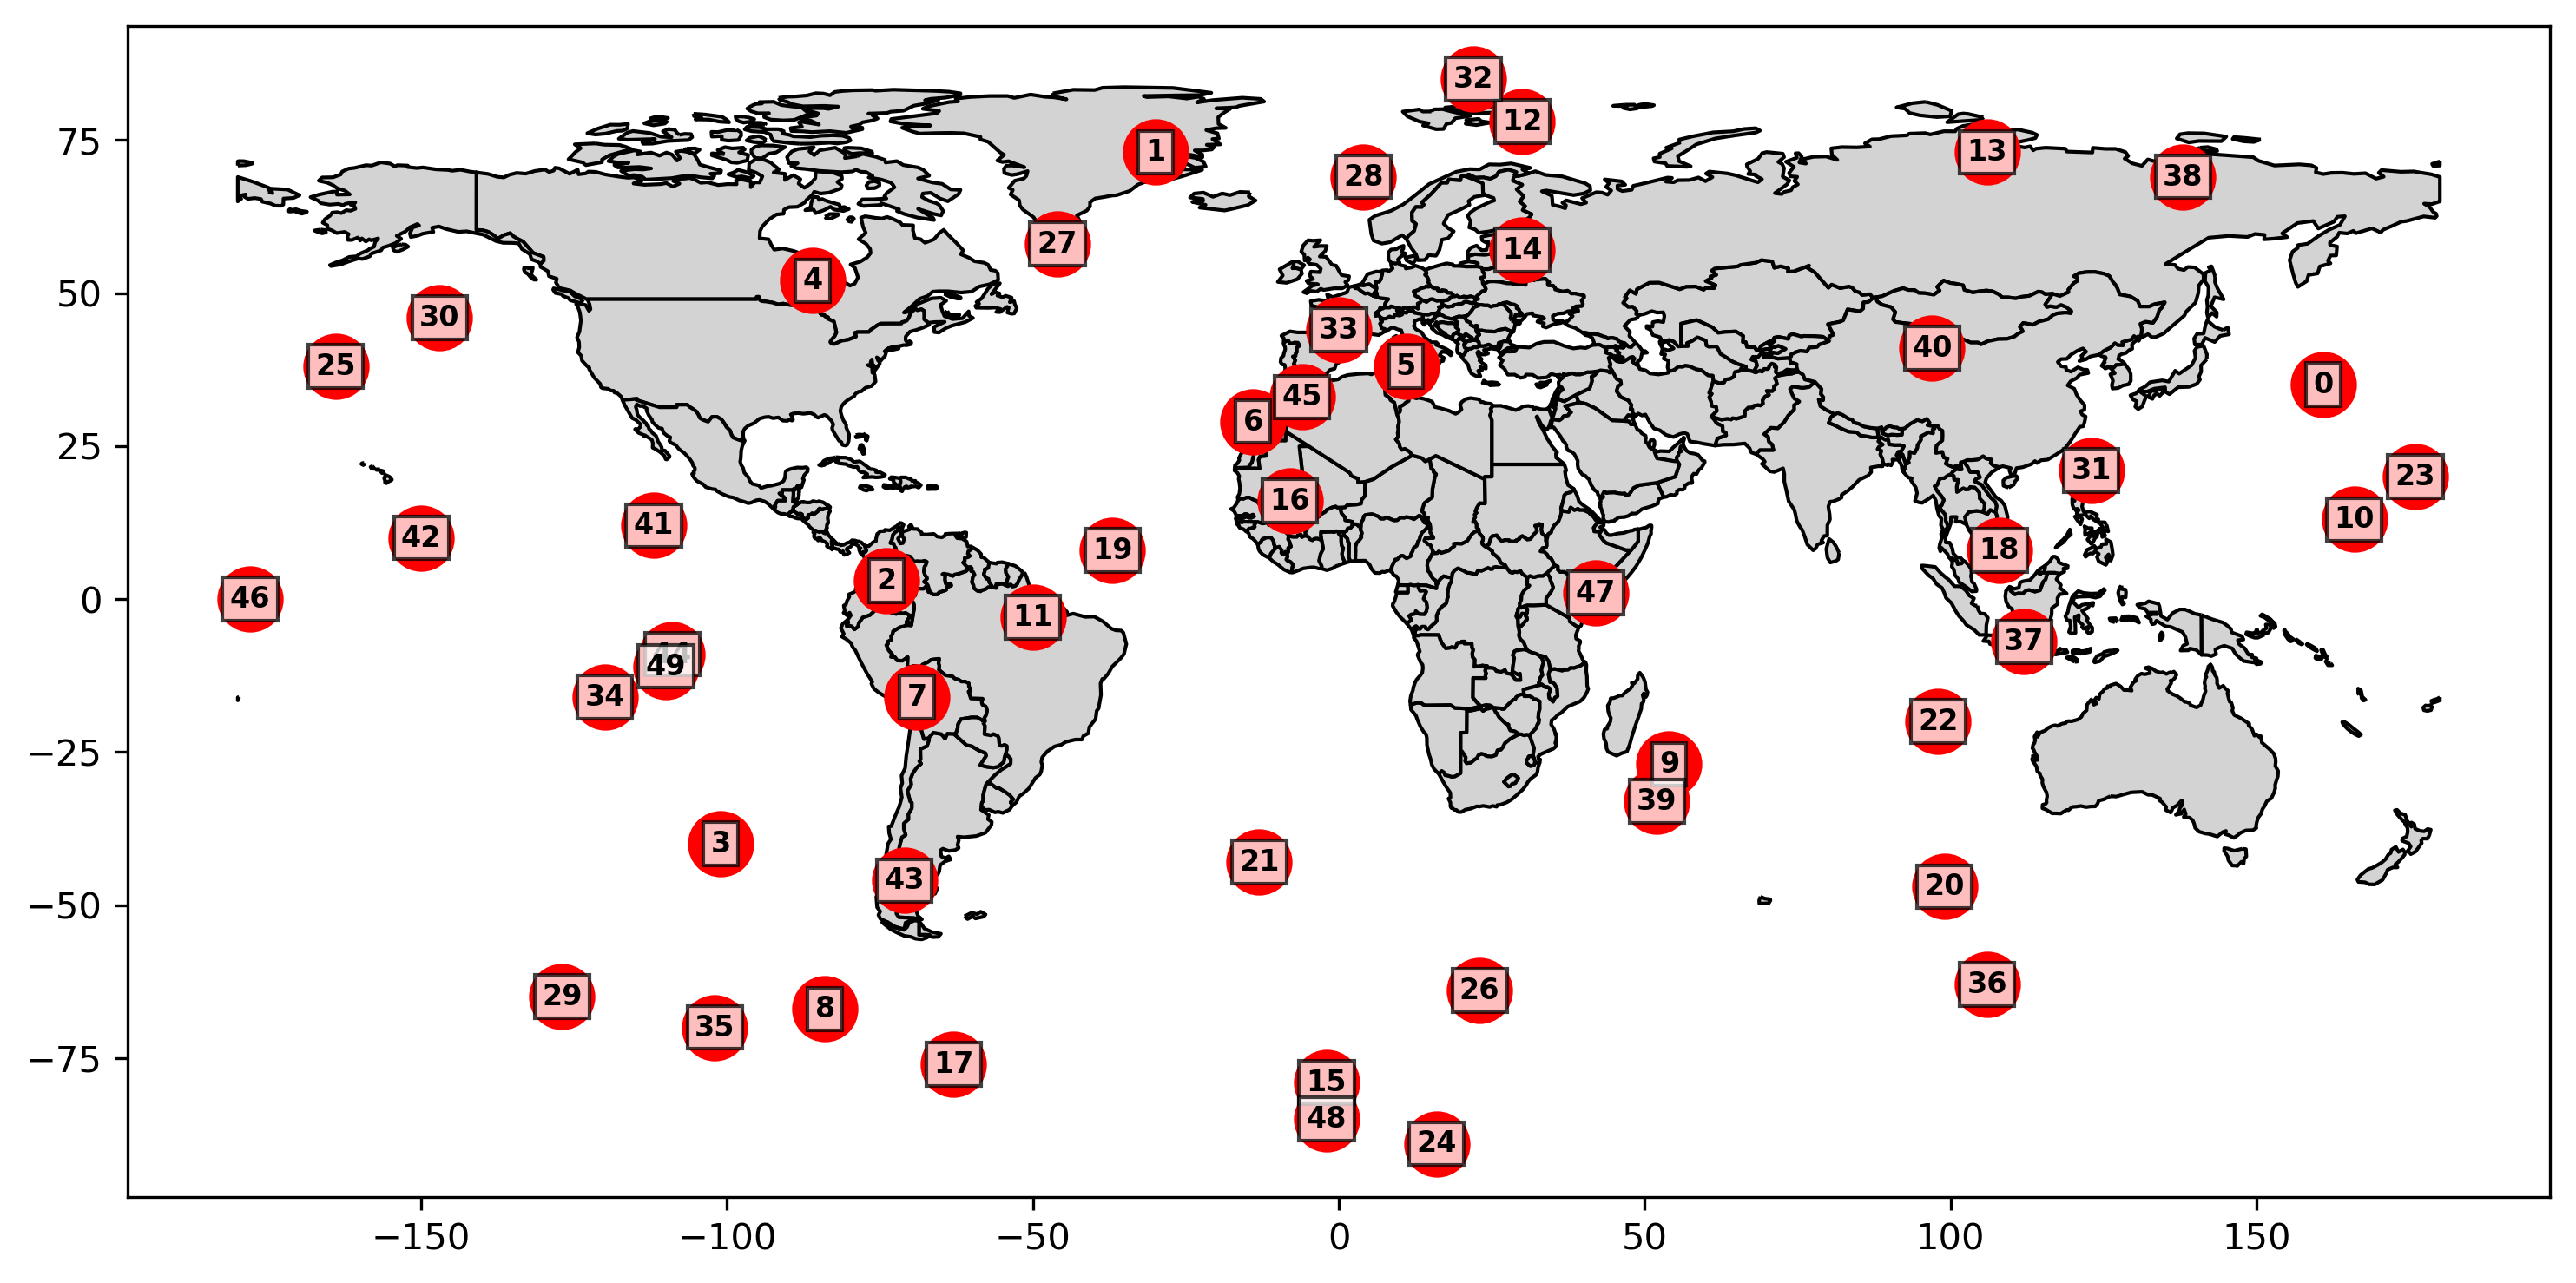

In [27]:
### Add Text:
########

#Get our base plot:
fig, ax1 = plt.subplots(1,1, figsize=(12, 8), dpi=300)

world.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')
gdf_point.plot(ax = ax1, markersize = 300, color='red');


#What if we didn't have Latitude/Longitude columns?
#######

for i, p in enumerate(gdf_point.geometry):
    #Observe:
    #print(p.coords.xy[0][0])
    
    #Or just:
    #print(p.x)

    #Plot:
    text_str = gdf_point.iloc[i].Name

    ax1.text(p.x, p.y, text_str, fontsize=8, fontweight='bold', color='black',
             bbox={'facecolor':'white','alpha':.75,'edgecolor':'black','pad':2},
             ha='center', va='center')

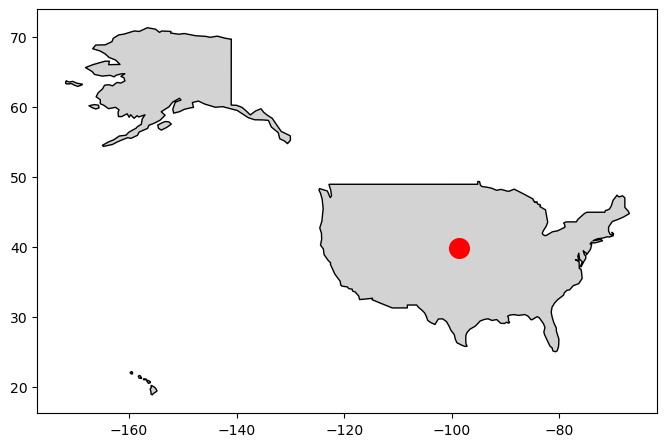

In [28]:
#Make a GeoDataFrame with just a single point at ostensible geographic center of the contiguous US
####39°50′N 98°35
df = pd.DataFrame(
    {'Description': ['Geographic Center'],
     'Latitude': [39 + 50/60],
     'Longitude': [-(98 + 35/60)]})

gdf_center = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude), crs = "EPSG:4326")


fig, ax1 = plt.subplots(1,1, figsize=(8, 6))

world.loc[world['iso_a3'] == 'USA'].plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')
gdf_center.plot(ax = ax1, markersize = 200, color='red');

In [29]:
#And plot in N. Am. Albers:
########

In [30]:
usa_map = world.loc[world['iso_a3'] == 'USA']

In [31]:
#Convert to North American Albers:
usa_map = usa_map.to_crs(5070)

#Convert Centroid:
gdf_center = gdf_center.to_crs(5070)

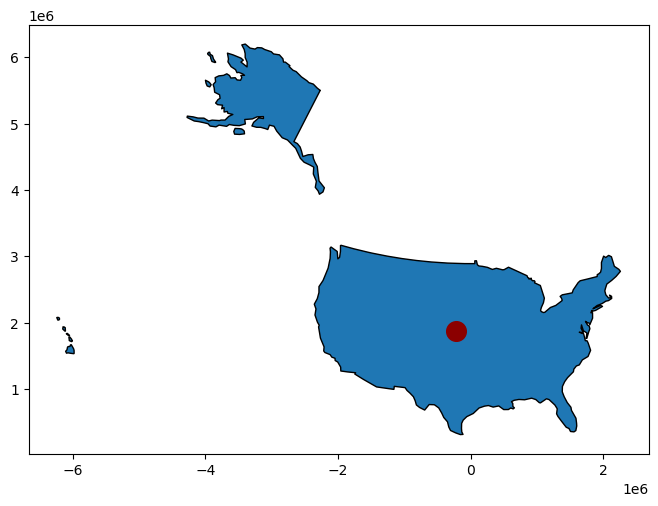

In [32]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 6))

usa_map.plot(ax = ax1, edgecolor='black')
gdf_center.plot(ax = ax1, markersize = 200, color='darkred');

#### Make and plot polygon geometries...

In [44]:
###Let's calculate and visualize the land area needed to generate all US electricity from Solar
#############

#Do everything in kWh

#Approx 2021 US electricity:
US_electricity = 4.116e12

#Solar irradiance, in kWh m-2 over the year, averaged over US
S = 1800

#Our solar efficiency, and a performance factor
E = .18
PF = .75

#Energy over the year for a single square meter:
E_m2 = S * E * PF

#And now, required square meters:
m2_needed = US_electricity / E_m2

#In square miles:
sqmile_needed = m2_needed * 3.86102e-7
sqmile_needed

6539.900543209877

In [34]:
#Is this a lot?
#Various areas in square miles:
######

Lower48_area = 3.1199e6
US_area = 3.797e6
Maricopa_area = 9223

sqmile_needed / US_area

0.0017223862373478738

C:\Users\steff\Anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: >

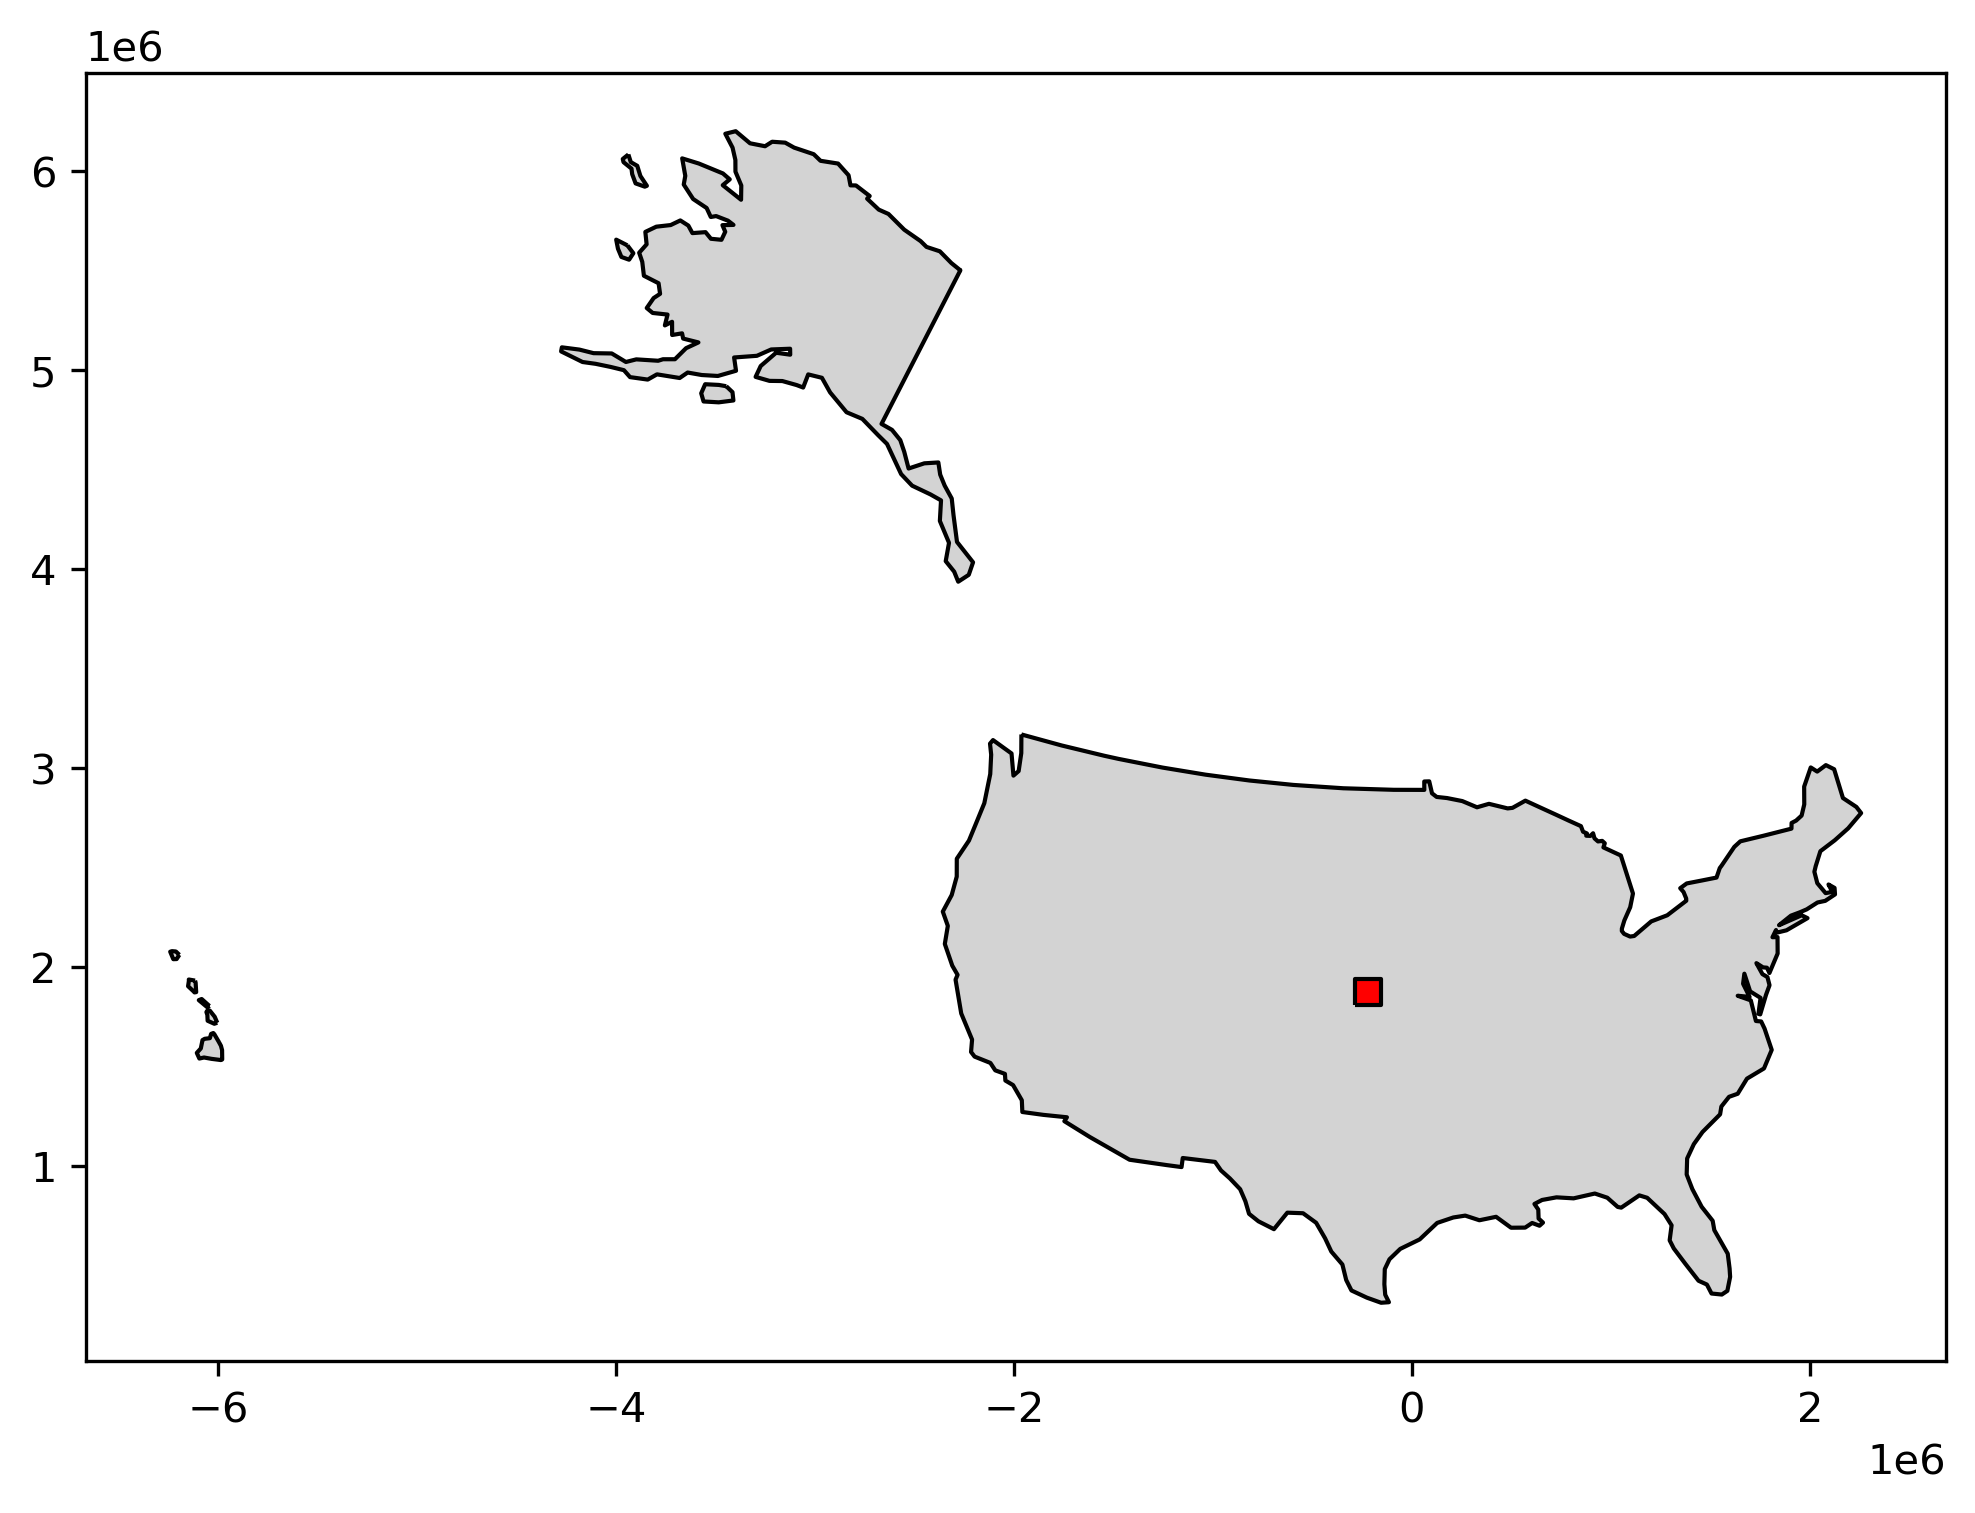

In [35]:
#And let's make a polygon...

#Get a shapely Polygon
from shapely.geometry import Polygon

#Just make a square with the area of m2_needed
val = np.sqrt(m2_needed)


#Use "geographic center" for base x/y
x_base = gdf_center.geometry[0].x - val/2 #-1.5e6
y_base = gdf_center.geometry[0].y - val/2 #1.5e6


#And make our polygon:
#####
lon_list = [x_base, x_base+val, x_base+val, x_base]
lat_list = [y_base, y_base, y_base+val, y_base+val]

polygon_geom = Polygon(zip(lon_list, lat_list))


#And put into a GeoDataFrame:
crs = {'init': 'epsg:5070'} #Can just use 5070 also
solar_rect = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])


#Plot...
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=300)
usa_map.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')
solar_rect.plot(ax = ax1, facecolor = 'red', edgecolor='black')

In [36]:
#What does our GeoDataFrame look like?
solar_rect

geometry
0  POLYGON ((-284162.691 1806207.058, -154015.576...

In [37]:
#Area for solar as fraction of US area?
###########

solar_rect.area.values[0] / usa_map.area.values[0]

0.001781023124536202

In [38]:
#Get the areas of the polygons that make up the multipolygon?
polys = usa_map.geometry.explode()

polys

C:\Users\steff\AppData\Local\Temp\ipykernel_5580\706844601.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  polys = usa_map.geometry.explode()


4  0    POLYGON ((-1962161.370 3167162.825, -1759245.2...
   1    POLYGON ((-5994579.739 1621439.289, -5984478.4...
   2    POLYGON ((-6002902.016 1718460.300, -6017763.5...
   3    POLYGON ((-6042036.927 1802608.920, -6051657.0...
   4    POLYGON ((-6114401.729 1930232.663, -6111577.2...
   5    POLYGON ((-6193278.678 2059630.455, -6207172.8...
   6    POLYGON ((-3942083.583 5624680.128, -3912081.0...
   7    POLYGON ((-3445165.527 4916819.652, -3413967.0...
   8    POLYGON ((-2268903.691 5499339.016, -2268904.2...
   9    POLYGON ((-3937165.872 6081290.121, -3924949.6...
Name: geometry, dtype: geometry

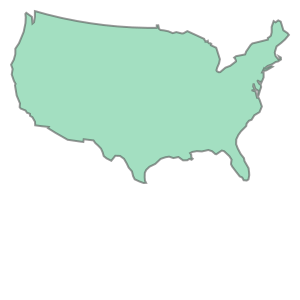

In [39]:
#The first is CONUS:
polys.iloc[0]

In [40]:
#Note, if you want the coords:
list(polys.iloc[0].exterior.coords)

[(-1962161.3702512002, 3167162.8253698274),
 (-1759245.223554072, 3111553.021991967),
 (-1545449.8641823747, 3059930.330641052),
 (-1474314.817510893, 3044312.189669965),
 (-1252770.7102802936, 3000572.8577133156),
 (-1037132.9583914476, 2965028.528822212),
 (-816816.8419056496, 2935763.5831406866),
 (-595559.4239206862, 2913440.4502210645),
 (-344366.35286531027, 2896648.6669438877),
 (-91028.37163248812, 2888887.159950868),
 (62301.831000003694, 2888497.2179712243),
 (62147.38396207218, 2930667.6015315508),
 (87068.35232383838, 2931459.6548542823),
 (101006.71912840151, 2871364.440293248),
 (124418.75843760684, 2853125.822644014),
 (176573.7886802904, 2847470.3865310536),
 (253257.45300077528, 2832260.9967512945),
 (327245.01461478753, 2801104.8235037685),
 (387207.16933892755, 2818455.9851389676),
 (481130.7062799805, 2795471.349114236),
 (505602.3432948148, 2798248.833605114),
 (570219.6059053084, 2834425.8915207386),
 (643838.0438532329, 2800561.163444683),
 (721422.9436960664, 27

In [41]:
#And area as fraction of CONUS area:
###########

solar_rect.area.values[0] / polys.iloc[0].area

0.002121437197137368

In [42]:
type(polys.iloc[0])

shapely.geometry.polygon.Polygon

<AxesSubplot: >

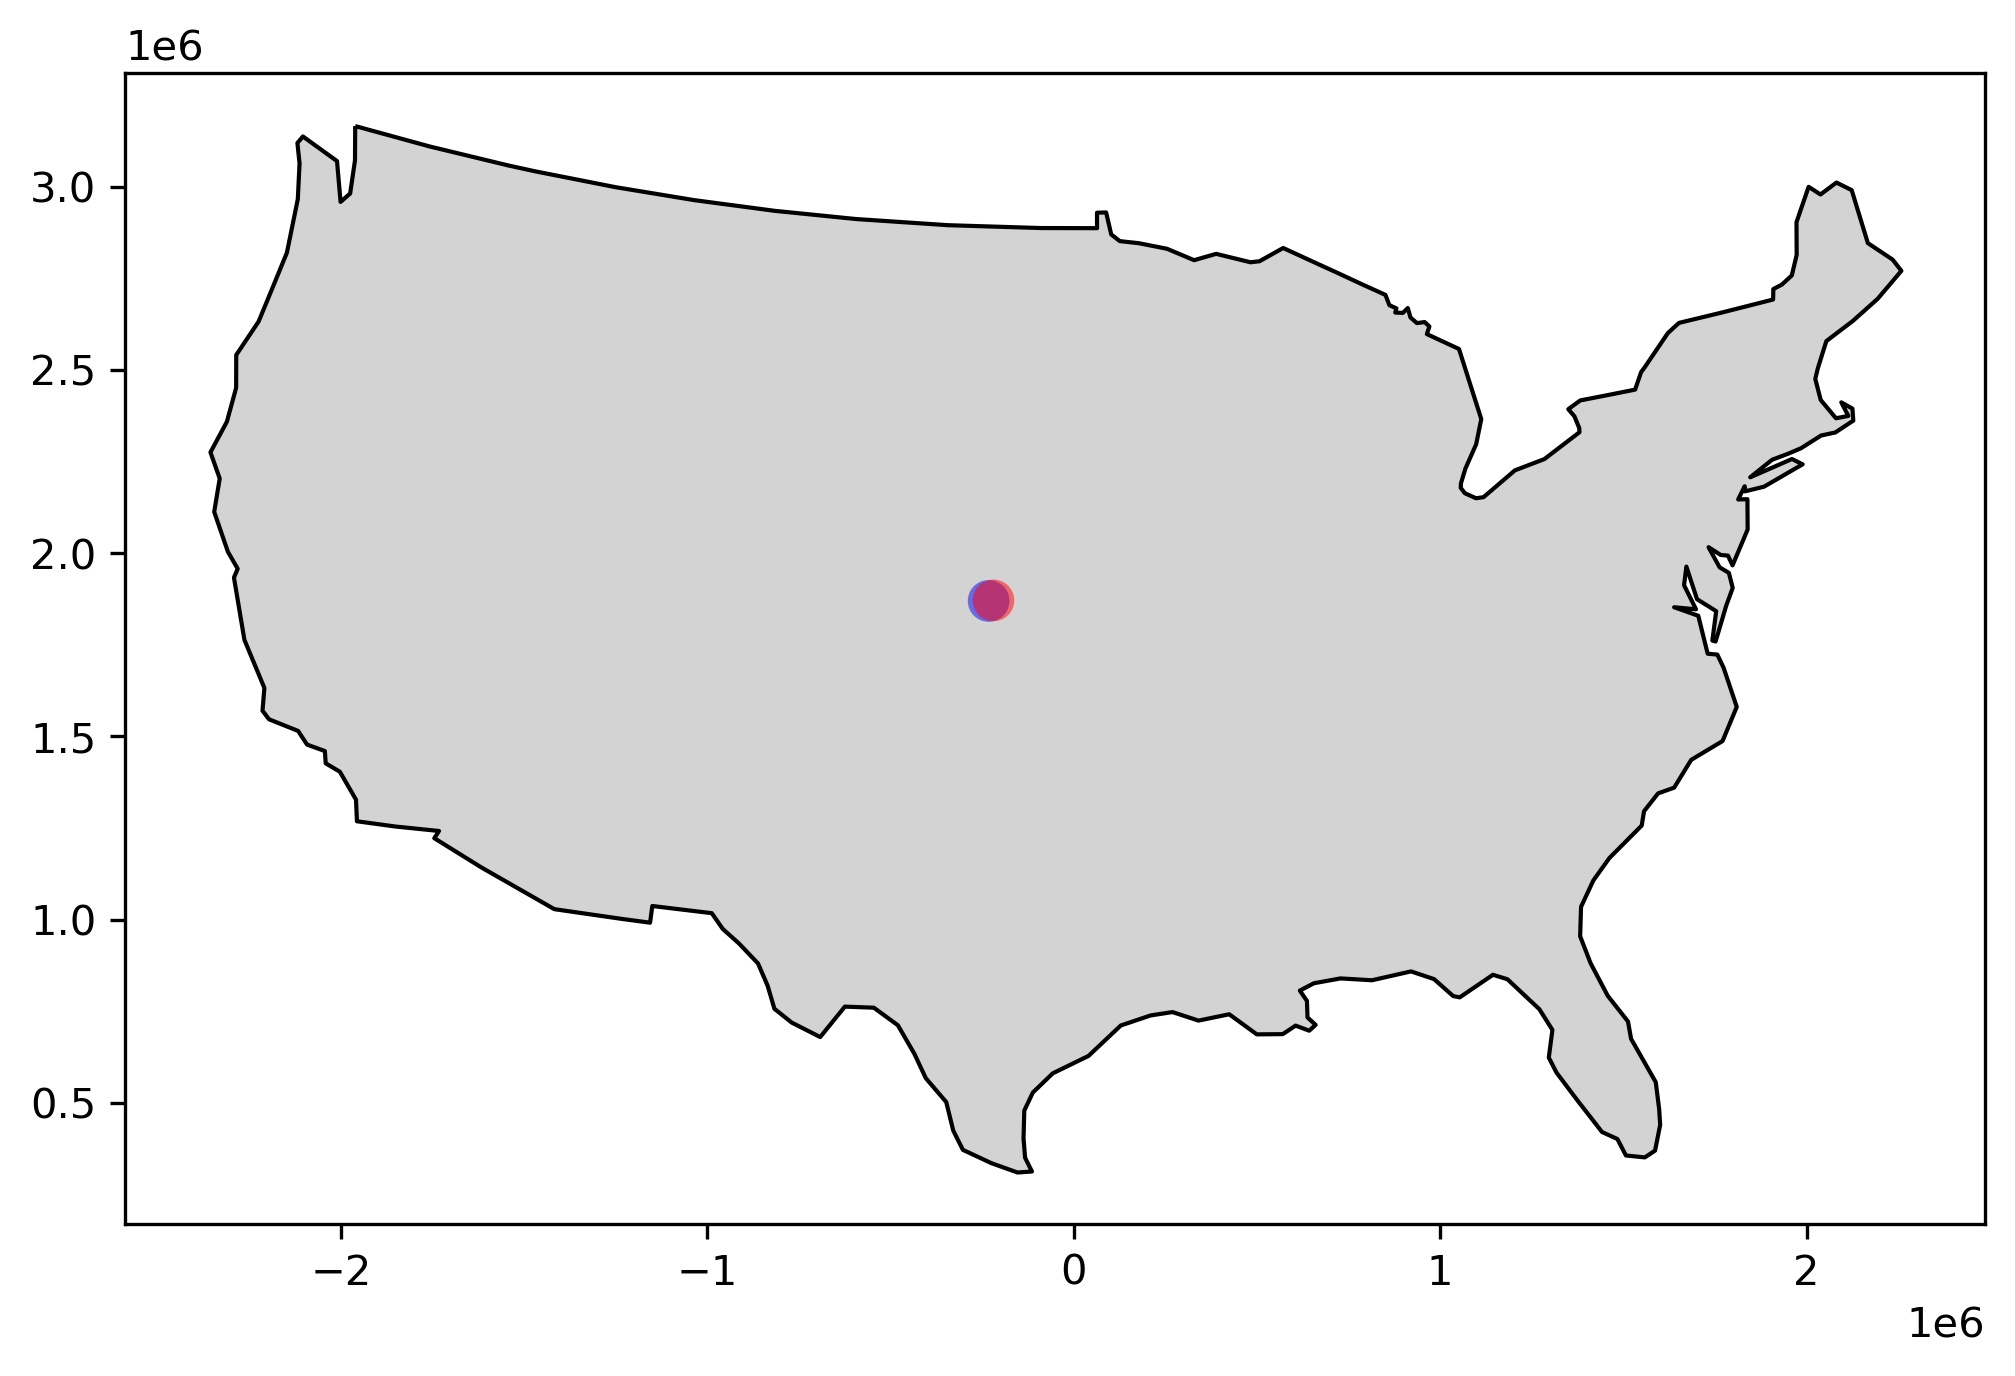

In [43]:
#Note, we can also make a GeoDataFrame of CONUS:

gdf_CONUS = gpd.GeoDataFrame(index=[0], geometry = [polys.iloc[0]], crs = "EPSG:5070")


fig, ax1 = plt.subplots(1,1, figsize=(8, 6), dpi=300)

gdf_CONUS.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')

#Plot the calculated centroid:
gdf_CONUS['cent'] = gdf_CONUS.centroid
gdf_CONUS = gdf_CONUS.set_geometry('cent')

gdf_CONUS.plot(ax = ax1, facecolor = 'blue', edgecolor='none', markersize=100, alpha=.5)

#Compare to the given value:
gdf_center.plot(ax = ax1, facecolor = 'red', edgecolor='none', markersize=100, alpha=.5)